In [1]:
import matplotlib.pyplot as pltimport
import xhermes as xh
from boutdata.data import BoutData
from boutdata import collect
import matplotlib
# matplotlib.use('Agg')  # Use a non-GUI backendk
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import glob     
import re
import numpy as np
import pandas as pd
import imageio
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10}, )
# plt.rcParams['figure.dpi'] = 300

linewidth = 3
markersize = 10

In [48]:
# ds_exp = xh.open('/shared/storage/plasmahwdisks/data/jlb647/simulation_data/flux_limiter_detachment/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_0.4/neon_0.04')

# print(ds_exp)

OSError: No datafiles found matching datapath=/shared/storage/plasmahwdisks/data/jlb647/simulation_data/flux_limiter_detachment/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_0.4/neon_0.04/BOUT.dmp.*.nc

In [3]:
ds = pd.read_pickle('/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/flux_limit/Flux_limiter_detachment_ITER_final.pickle')

print(ds['alpha'].unique())

print(ds.columns)

['SH' '0.06' '0.1' '0.2' '0.4' 'SNB']
Index(['Bxy', 'Ed+_iz', 'Ed+_rec', 'Ed_target_recycle', 'Edd+_cx', 'Fd+_iz',
       'Fd+_rec', 'Fdd+_cx', 'G1', 'G2', 'G3', 'J', 'NVd', 'NVd+', 'Nd', 'Nd+',
       'Ne', 'Pd', 'Pd+', 'Pd+_src', 'Pd_src', 'Pe', 'Pe_src', 'Rd+_ex',
       'Rd+_rec', 'Rneon', 'SNVd', 'SNVd+', 'SNd', 'SNd+', 'SPd', 'SPd+',
       'SPe', 'Sd+_feedback', 'Sd+_iz', 'Sd+_rec', 'Sd+_src', 'Sd_src',
       'Sd_target_recycle', 'Td', 'Td+', 'Te', 'Vd', 'Vd+', 'Ve', 'ddt(NVd)',
       'ddt(NVd+)', 'ddt(Nd)', 'ddt(Nd+)', 'ddt(Pd)', 'ddt(Pd+)', 'ddt(Pe)',
       'density_feedback_src_i_d+', 'density_feedback_src_mult_d+',
       'density_feedback_src_p_d+', 'density_feedback_src_shape_d+', 'g11',
       'g12', 'g13', 'g22', 'g23', 'g33', 'g_11', 'g_12', 'g_13', 'g_22',
       'g_23', 'g_33', 'kappa_par_d', 'kappa_par_d+', 'kappa_par_e', 't_array',
       'ncalls', 'ncalls_e', 'ncalls_i', 'target_temp', 'y', 'alpha',
       'neon_frac', 'Div_Q_SH', 'Div_Q_SNB'],
      dtype='obje

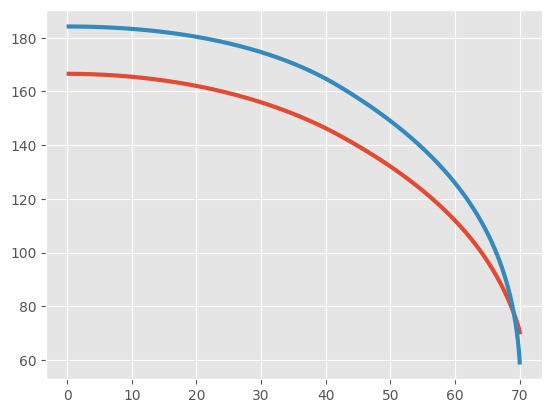

In [3]:
SH_ne0_ds = ds[(ds['alpha'] == 'SH') & (ds['neon_frac'] == 0.0)]

FL02_ne0_ds = ds[(ds['alpha'] == '0.2') & (ds['neon_frac'] == 0.0)]

plt.plot(SH_ne0_ds['y'], SH_ne0_ds['Te'], label= 'SH', linewidth=linewidth, markersize=markersize)

plt.plot(FL02_ne0_ds['y'], FL02_ne0_ds['Te'], label='SNB', linewidth=linewidth, markersize=markersize)

plt.show()

plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams.update({'font.size': 14})


colors = {
    'SH': '#E24A33',
    '0.2': '#348ABD',
    '0.1': '#988ED5',
    '0.06': 'grey',
    '0.3': '#777777',
    '0.4': '#FBC15E',
    'SNB': 'yellow'
}


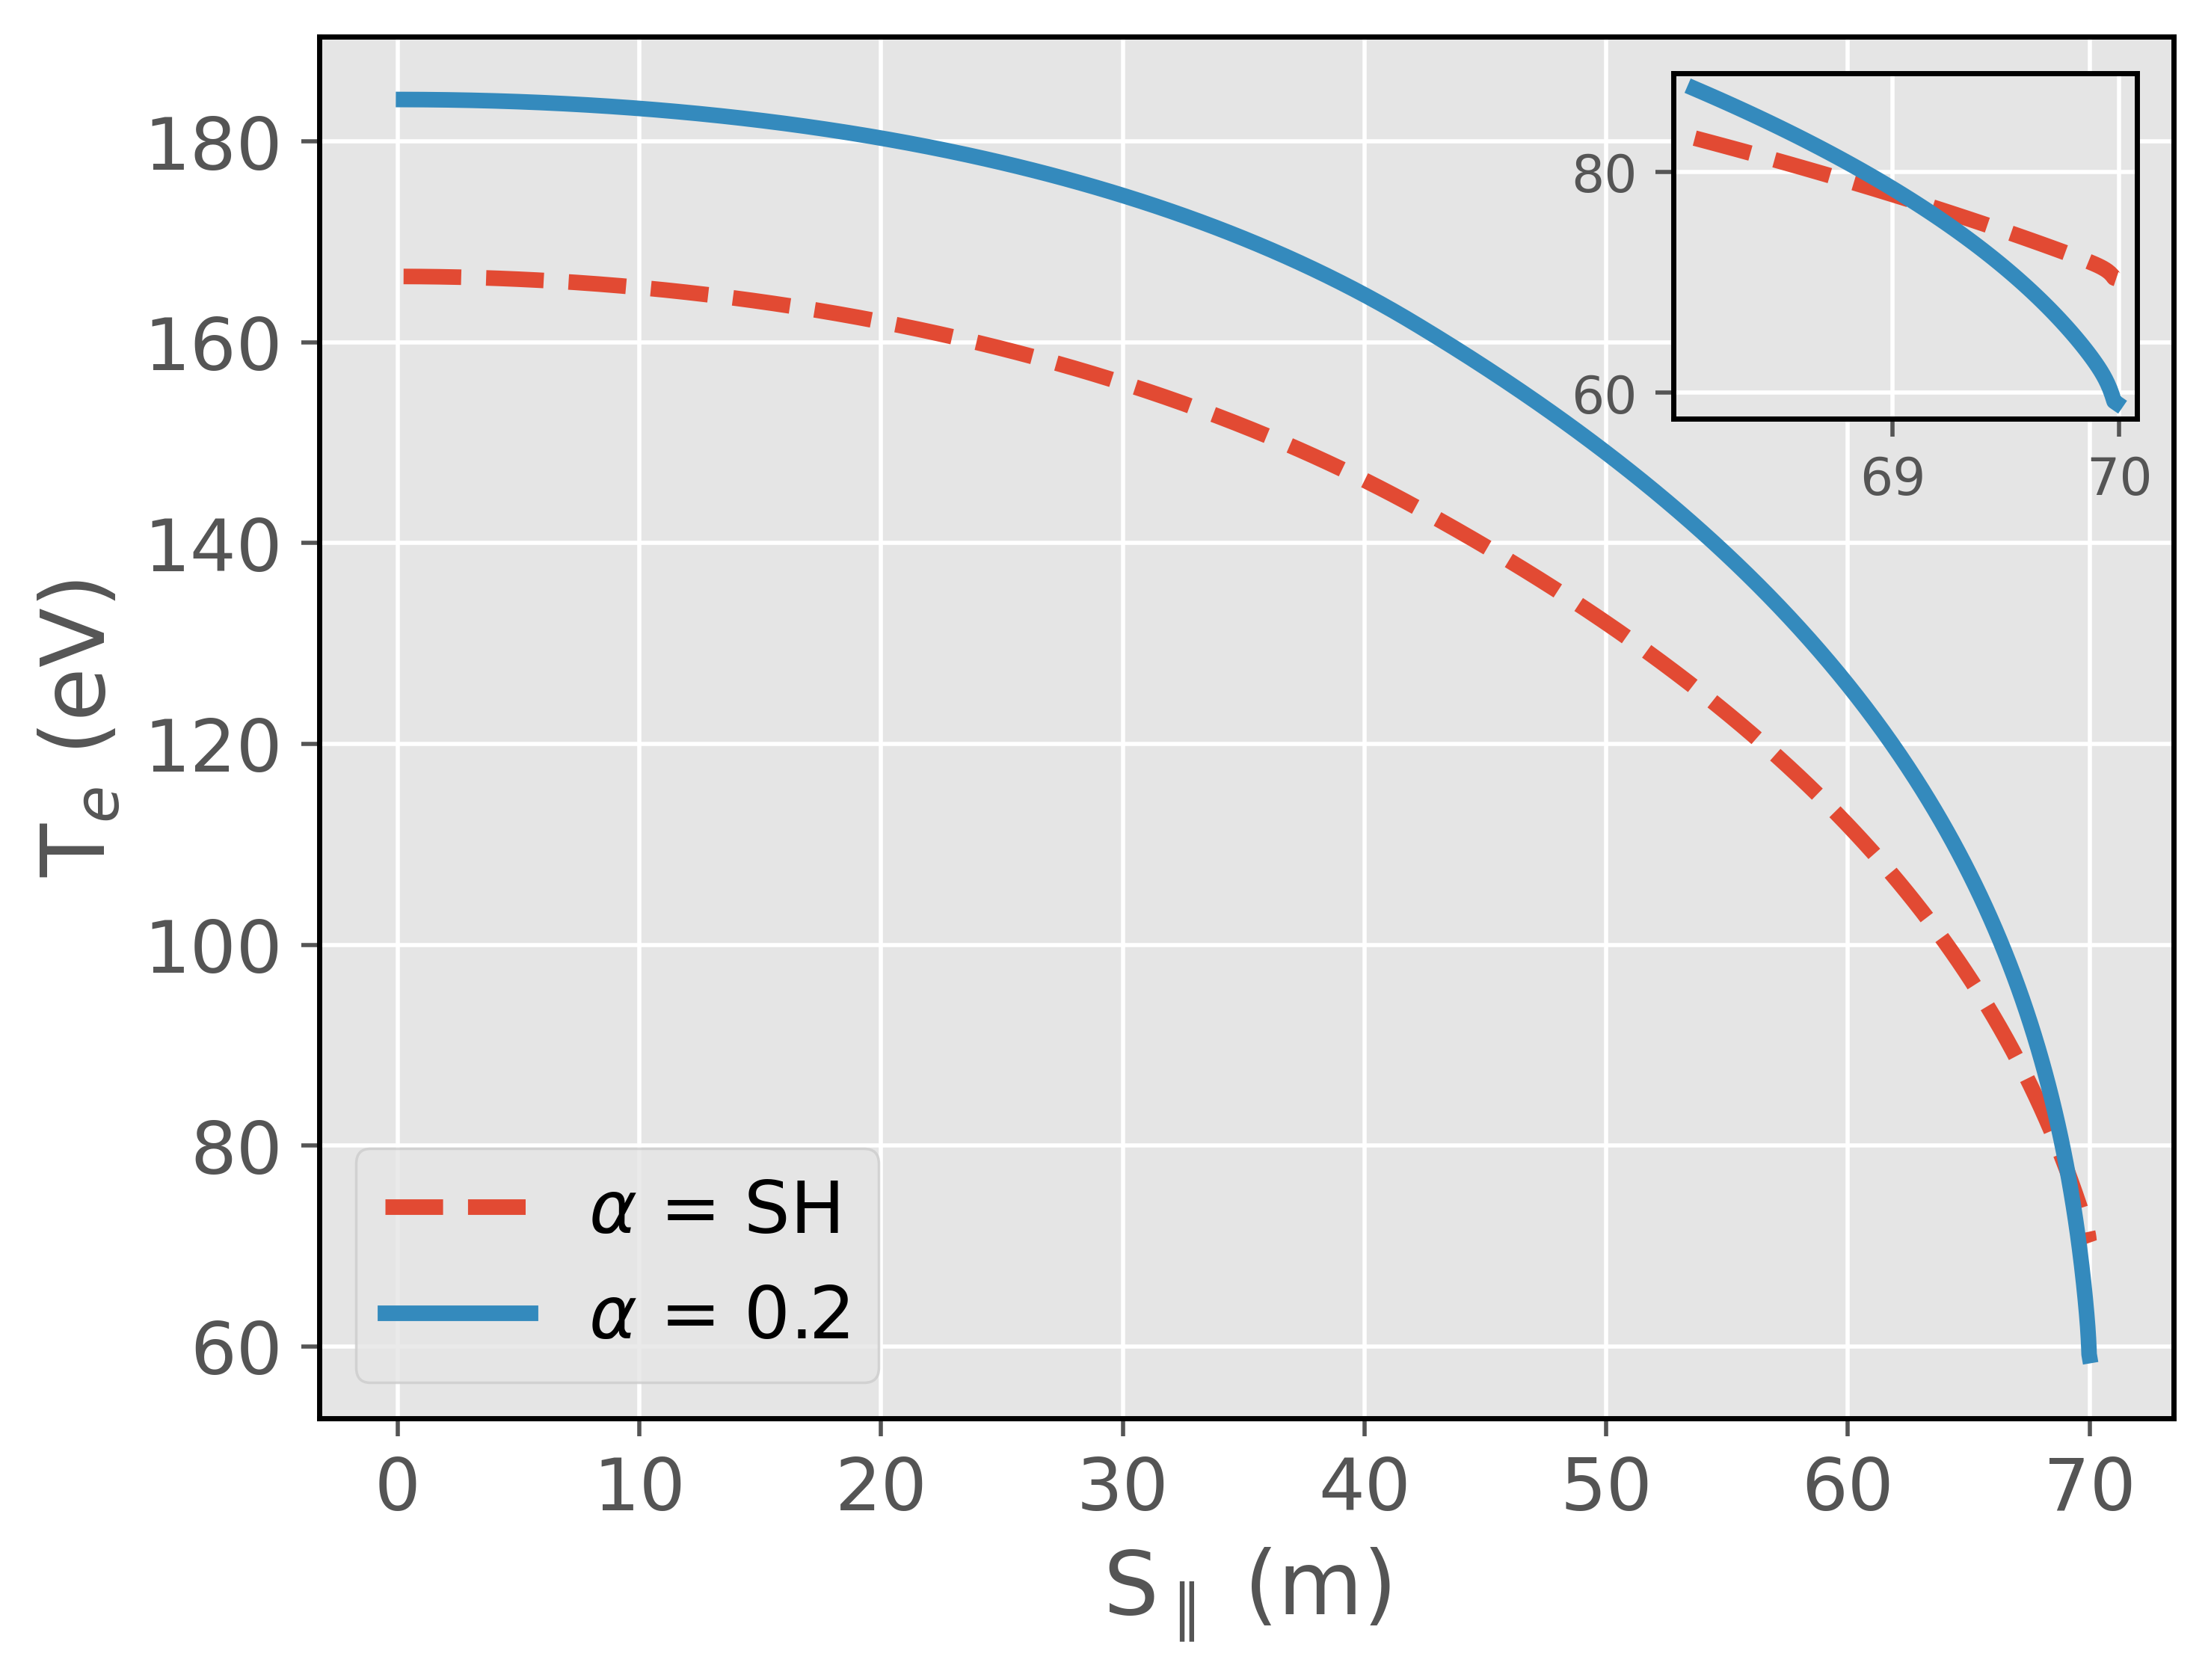

In [ ]:


# Set up the main plot
fig, ax = plt.subplots(dpi = 500)
ax.plot(SH_ne0_ds['y'], SH_ne0_ds['Te'], label=r'$\alpha$ = ' + f'SH', linewidth=linewidth, markersize=markersize, linestyle = '--')
ax.plot(FL02_ne0_ds['y'], FL02_ne0_ds['Te'], label=r'$\alpha$ = ' + f'0.2', linewidth=linewidth, markersize=markersize, color = '#348ABD')

ax.set_xlabel(r'S$_\parallel$ (m)')
ax.set_ylabel(r'T$_e$ (eV)')

# Create an inset plot within the main plot
ax_inset = inset_axes(ax, width="25%", height="25%", loc='upper right')
# ax_inset.plot(x[-20:], y[-20:], color='r')  # Plotting the last 20 points?
ax_inset.plot(SH_ne0_ds['y'][-100:], SH_ne0_ds['Te'][-100:], linewidth=linewidth, markersize=markersize, linestyle = '--')
ax_inset.plot(FL02_ne0_ds['y'][-100:], FL02_ne0_ds['Te'][-100:], linewidth=linewidth, markersize=markersize,color = '#348ABD')
ax_inset.tick_params(axis='both', which='major', labelsize=10)  # Adjust font size here
# ax_inset.set_title('Inset Plot Zoom on Last 20 Points')

# Set the outline color to black
ax_inset.spines['bottom'].set_color('black')
ax_inset.spines['top'].set_color('black')
ax_inset.spines['left'].set_color('black')
ax_inset.spines['right'].set_color('black')



# Set the outline color to black
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

ax.legend(loc = 'lower left')
# Instead of showing the plot, save it to a file
# plt.savefig('example_flux_limitation.png')

In [ ]:
plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams.update({'font.size': 14})

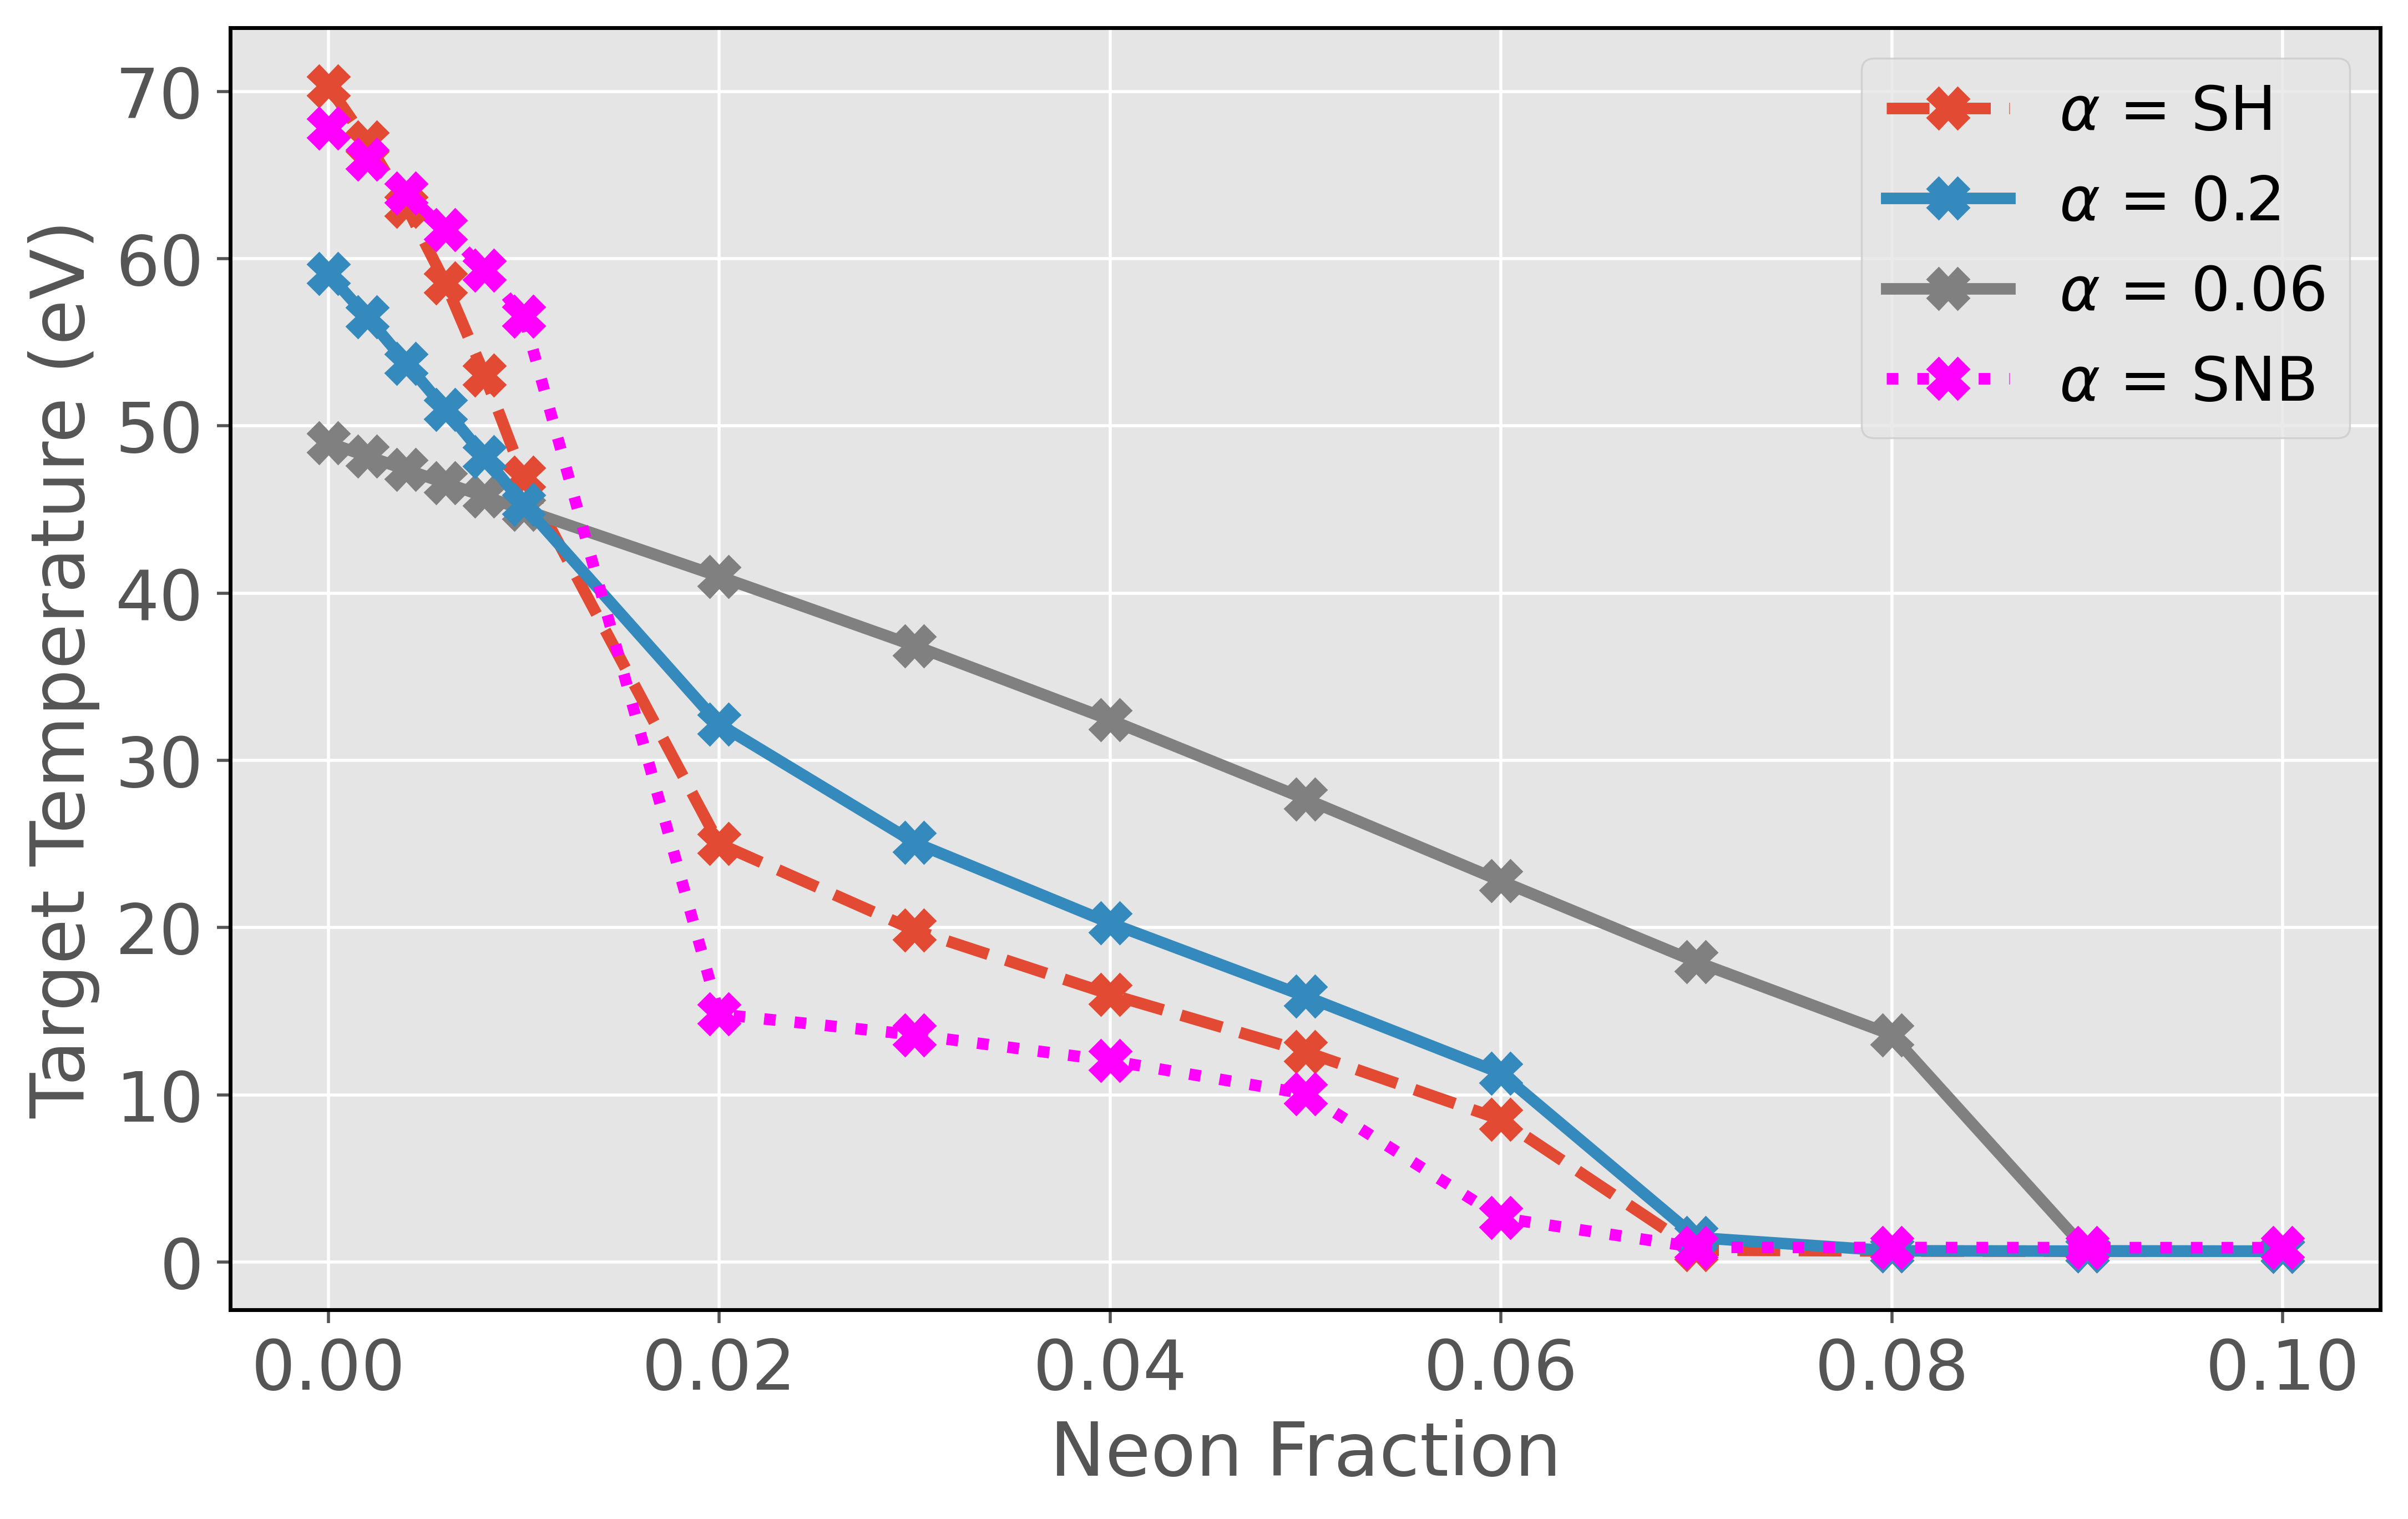

In [56]:
plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams.update({'font.size': 14})


fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi = 500)

# print(ds['alpha'].unique())

for i in ds['alpha'].unique():
    if i not in ['0.1','0.4']:  # Exclude plotting for alpha = 'SNB'
        target_temp_list = []
        target_pcle_flux_list = []
        neon_frac_list = []
        df_alpha = ds[ds['alpha'] == f'{i}']
        if i == 'SH':
            linestyle = '--'
        elif i == 'SNB':
            linestyle = ':'
        else:
            linestyle = '-'

        for j in df_alpha['neon_frac'].unique():
            # print(df_alpha['neon_frac'].unique())
            if j < 0.11:


                try:
                    target_pcle_flux = (df_alpha[(df_alpha['alpha'] == i) & (df_alpha['neon_frac'] == j)]['Vd+'].values[-1] *
                                        df_alpha[(df_alpha['alpha'] == i) & (df_alpha['neon_frac'] == j)]['Nd+'].values[-1])
                    target_pcle_flux_list.append(target_pcle_flux)

                    target_temp_list.append(ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['target_temp'].values[-1])
                except:
                    continue
                neon_frac_list.append(j)
        # print(i, target_temp_list)
        # print(neon_frac_list)


        ax.plot(neon_frac_list, target_temp_list, linewidth=linewidth, markersize=markersize,marker='X', label=r'$\alpha$' + f' = {i}', color = colors[i], linestyle = linestyle)




ax.set_xlabel('Neon Fraction')
ax.set_ylabel('Target Temperature (eV)')

# Set the outline color to black
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')


# Get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Desired order (SH, 0.2, 0.06)
order = [0, 2, 1, 3]

# Reorder handles and labels
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]

# Create the legend with the new order
plt.legend(handles, labels)


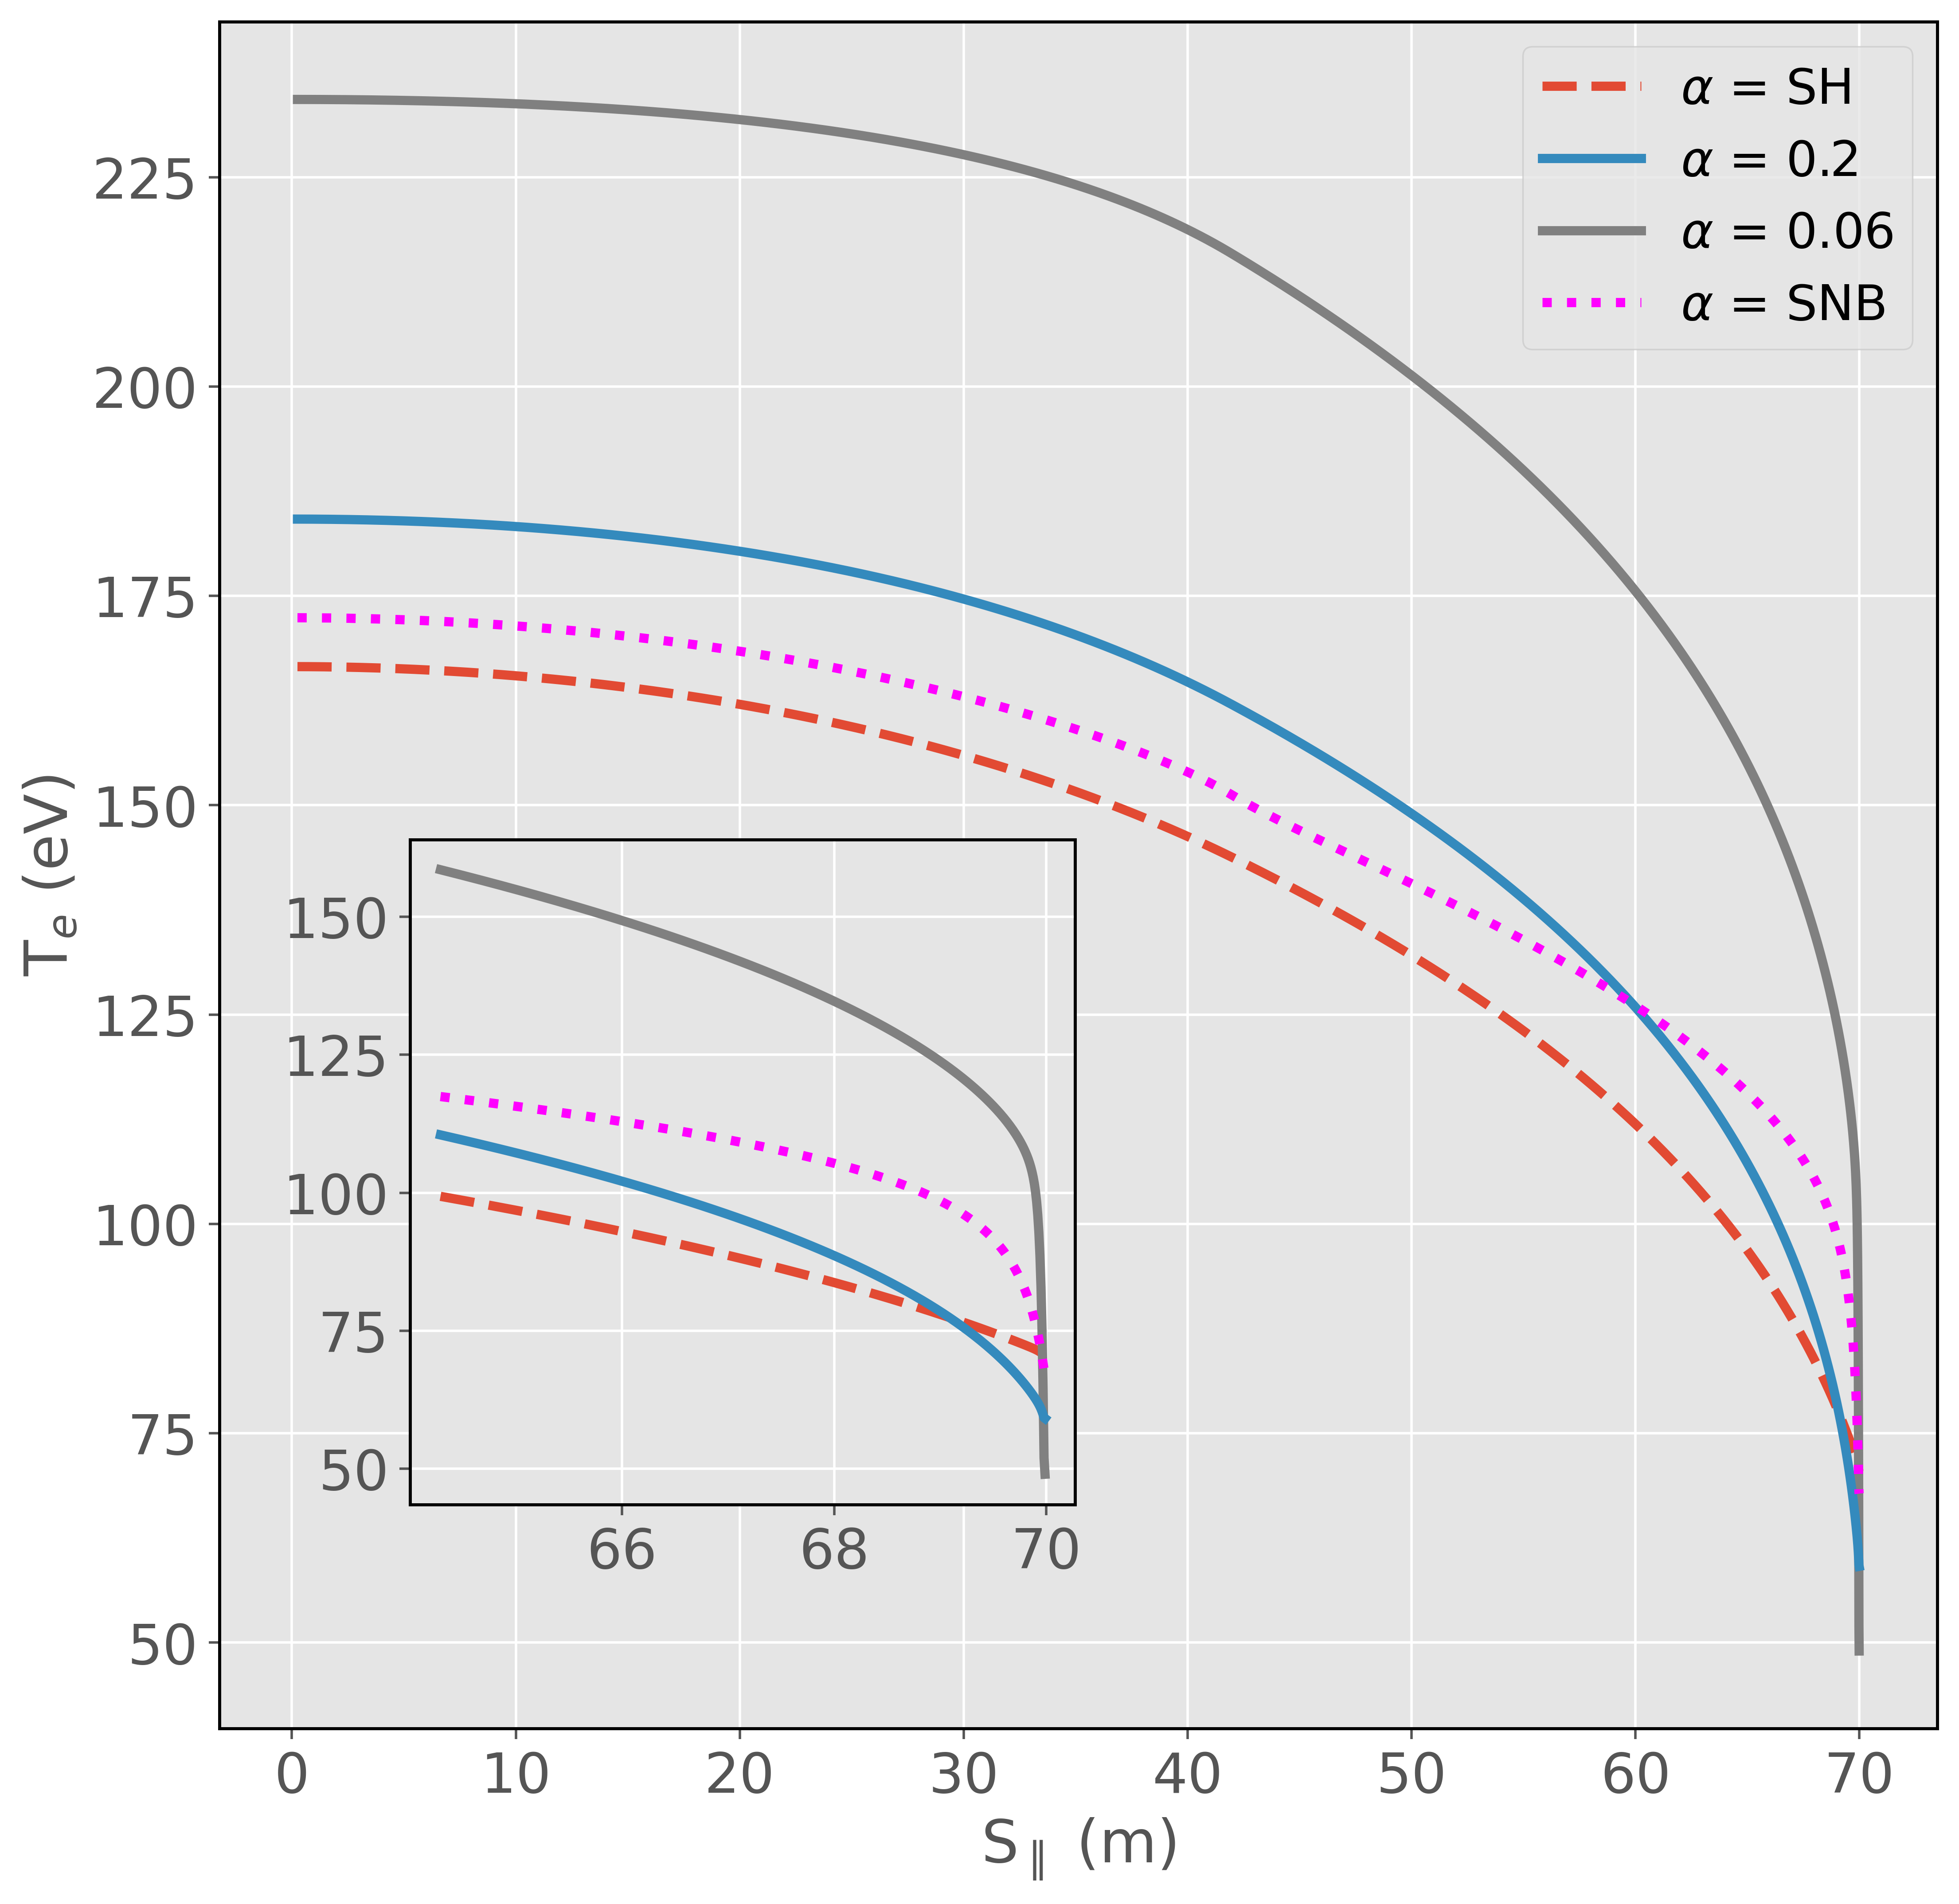

In [65]:
plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi = 500)
ax_inset = inset_axes(ax, width="30%", height="30%", loc='lower left',bbox_to_anchor=(0.2, 0.2, 1, 1), bbox_transform=fig.transFigure)


neon_0_ds = ds[ds['neon_frac'] == 0.0]


for i in neon_0_ds['alpha'].unique():
        if i not in ['0.1','0.4']:  # Exclude plotting for alpha = 'SNB'

            if i == 'SH':
                linestyle = '--'
            elif i == 'SNB':
                linestyle = ':'
            else:
                linestyle = '-'

            ax.plot(neon_0_ds[(neon_0_ds['alpha'] == i) & (neon_0_ds['neon_frac'] == 0.0)]['y'], neon_0_ds[(neon_0_ds['alpha'] == i) & (neon_0_ds['neon_frac'] == 0.0)]['Te'], 
                    label=r'$\alpha$' + f' = {i}', linewidth=linewidth, markersize=markersize, color = colors[i], linestyle = linestyle)
            ax_inset.plot(neon_0_ds[(neon_0_ds['alpha'] == i) & (neon_0_ds['neon_frac'] == 0.0)]['y'][-200:], neon_0_ds[(neon_0_ds['alpha'] == i) & (neon_0_ds['neon_frac'] == 0.0)]['Te'][-200:], 
            label=r'$\alpha$' + f' = {i}', linewidth=linewidth, markersize=markersize,color = colors[i], linestyle = linestyle)

# Get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Desired order (SH, 0.2, 0.06)
order = [0, 2, 1, 3]

# Reorder handles and labels
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]


ax.set_xlabel(r'S$_\parallel$ (m)')
ax.set_ylabel(r'T$_e$ (eV)')
ax.legend(handles, labels, loc = 'upper right')

SH
0.06
0.2


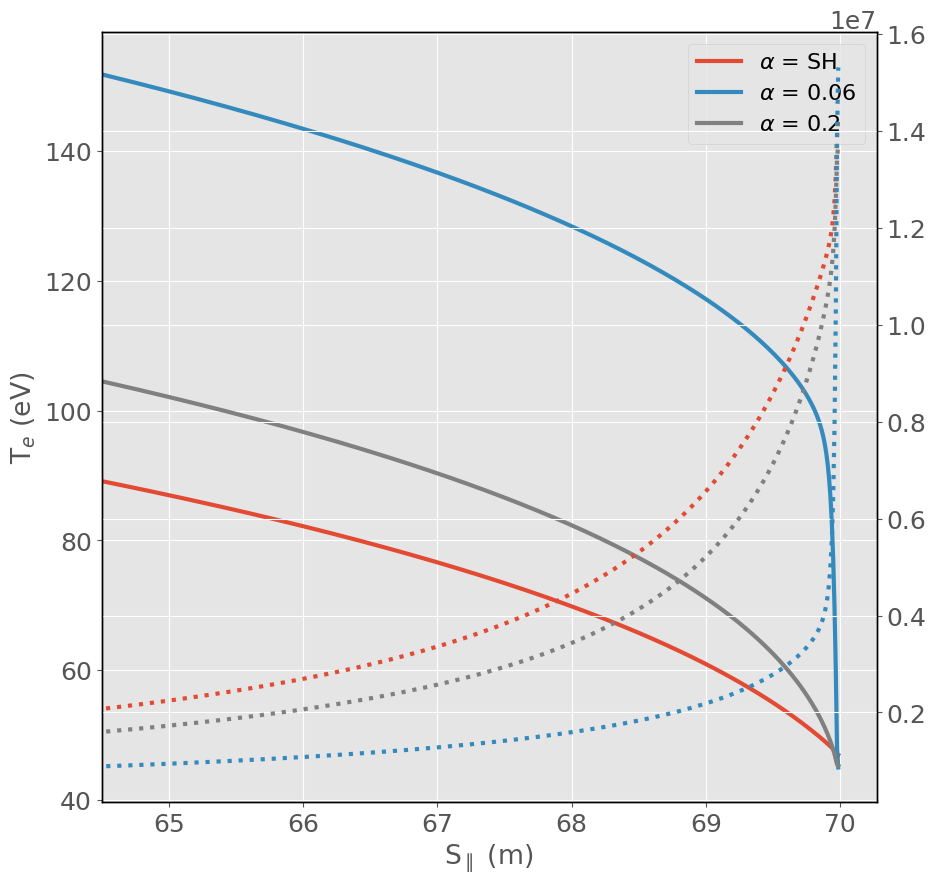

In [ ]:
plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi = 100)
ax_twin = ax.twinx()
# ax_inset = inset_axes(ax, width="30%", height="30%", loc='lower left',bbox_to_anchor=(0.2, 0.2, 1, 1), bbox_transform=fig.transFigure)


# # Define the colors for each 'alpha' (add more if there are more unique alphas)
# colors = {
#     'SH': '#E24A33',
#     '0.06': '#348ABD',
#     '0.1': '#988ED5',
#     '0.2': 'grey',
#     '0.3': '#777777',
#     '0.4': '#FBC15E',
#     'SNB': '#FFB5B8'
# }

#['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']

for i in ds['alpha'].unique():
    for j in ds['neon_frac'].unique():
        if i not in ['SNB', '0.1', '0.4']:  # Exclude alpha values of 0.1 and 0.4
            if j == 0.01:
                print(i)
                ax.plot(ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['y'][-200:], ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['Te'][-200:], label=r'$\alpha$' + f' = {i}', color=colors[i], linewidth=3, markersize=15)
                ax_twin.plot(ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['y'][-200:], ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['Rneon'][-200:], label=r'$\alpha$' + f' = {i}', color=colors[i], linewidth=3, markersize=15,
                             linestyle = ':')

ax.set_xbound(64.5)
ax.set_xlabel(r'S$_\parallel$ (m)')
ax.set_ylabel(r'T$_e$ (eV)')
ax.legend()

In [ ]:
import matplotlib.pyplot as plt

# Activate ggplot style
plt.style.use('ggplot')

# Retrieve the default color cycle from the current style
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Print the first seven colors
print(default_colors[:7])


['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']


SH
0.06
0.2
SNB


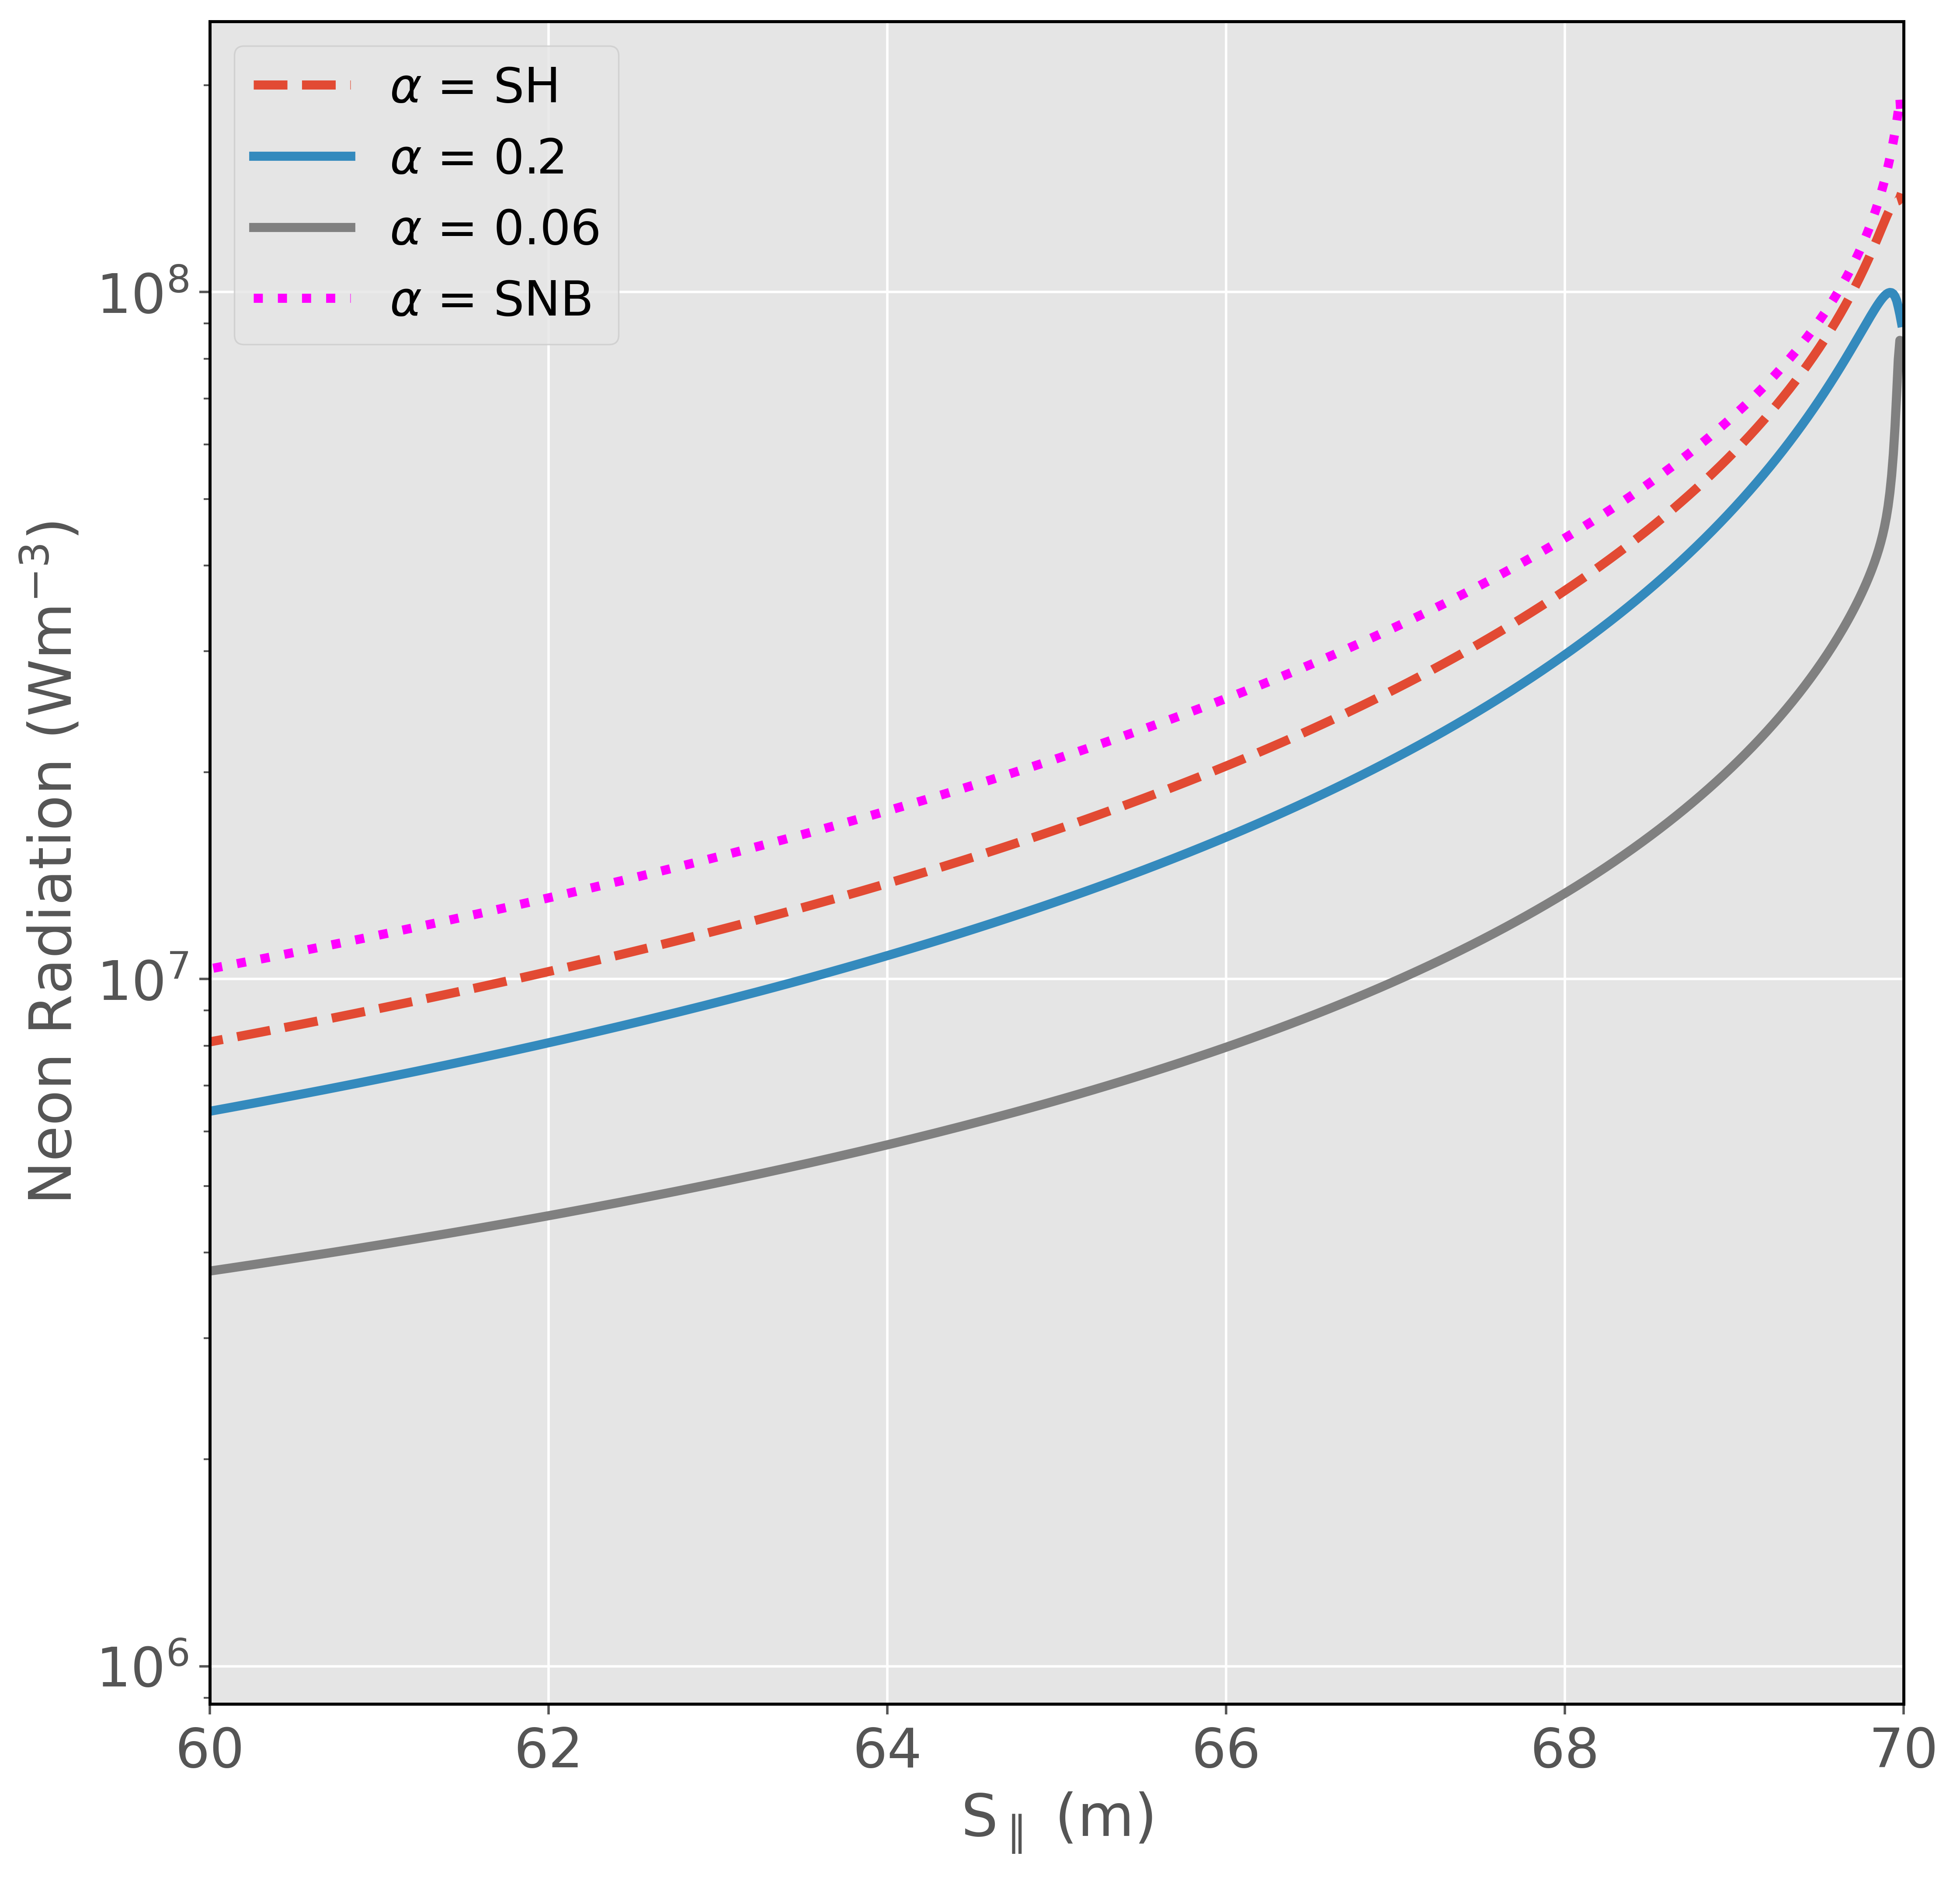

In [67]:
plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi = 500)
# ax_twin = ax.twinx()
# ax_inset = inset_axes(ax, width="30%", height="30%", loc='lower left',bbox_to_anchor=(0.2, 0.2, 1, 1), bbox_transform=fig.transFigure)


# # Define the colors for each 'alpha' (add more if there are more unique alphas)
# colors = {
#     'SH': '#E24A33',
#     '0.06': '#348ABD',
#     '0.1': '#988ED5',
#     '0.2': 'grey',
#     '0.3': '#777777',
#     '0.4': '#FBC15E',
#     'SNB': 'magenta'
# }

#['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']

for i in ds['alpha'].unique():
    if i == 'SH':
        linestyle = '--'
    elif i == 'SNB':
        linestyle = ':'
    else:
        linestyle = '-'
    for j in ds['neon_frac'].unique():
        if i not in ['0.1', '0.4']:  # Exclude alpha values of 0.1 and 0.4
            if j == 0.05:
                print(i)
                ax.plot(ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['y'], ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['Rneon'], 
                        label=r'$\alpha$' + f' = {i}', color=colors[i], linewidth=3, markersize=15, linestyle = linestyle)
                # ax_inset.plot(ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['y'][-200:], ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['Te'][-200:], 
                #         label=r'$\alpha$' + f' = {i}', color=colors[i], linewidth=3, markersize=15)

ax.set_xbound(60,70)
ax.set_yscale('log')
ax.set_xlabel(r'S$_\parallel$ (m)')
ax.set_ylabel(r'Neon Radiation (Wm$^{-3}$)')

# Get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Desired order (SH, 0.2, 0.06)
order = [0, 2, 1, 3]

# Reorder handles and labels
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]



ax.legend(handles, labels)

[6.35304113e-36 6.23378548e-34 9.47676853e-33 3.11102733e-32
 1.14635986e-32 1.17894628e-32]


/tmp/ipykernel_1398790/2082287714.py:4: RuntimeWarning: divide by zero encountered in log
  logT = np.log(Te)


Text(0, 0.5, 'Aggregate Neon Radiation (Wm$^{3}$)')

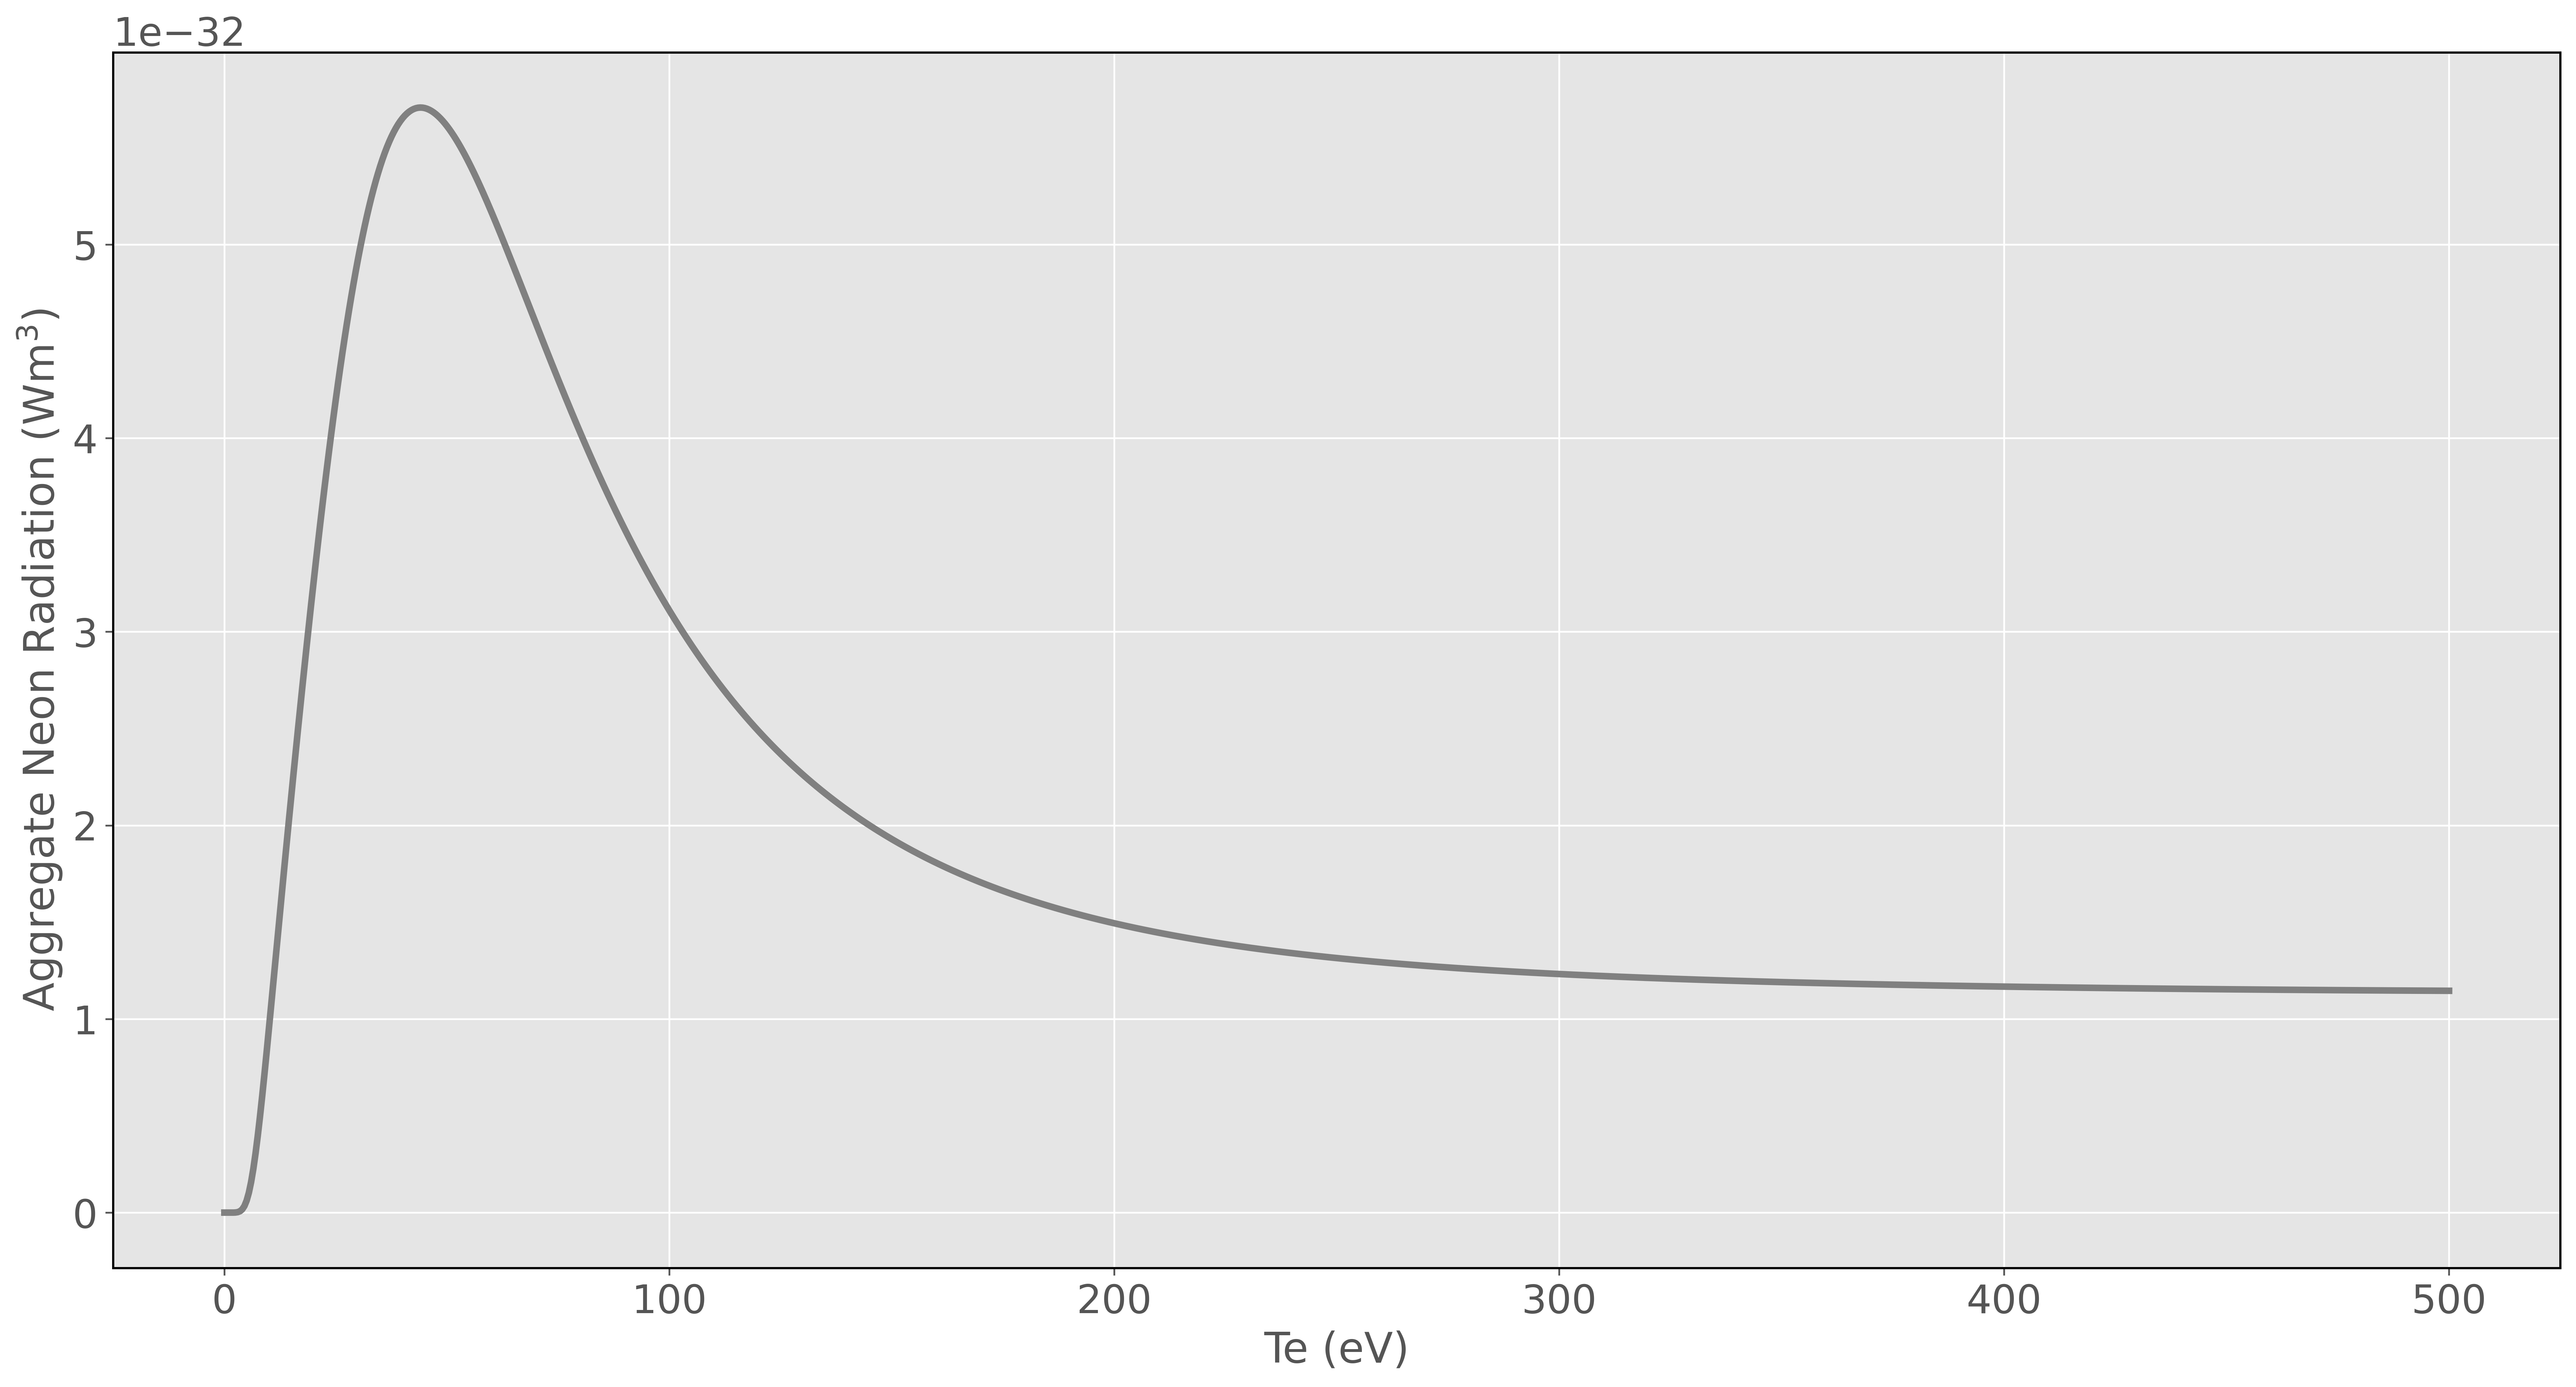

In [5]:
import numpy as np

def neon_adas_curve(Te):
    logT = np.log(Te)
    log_out = np.zeros_like(Te)

    # Coefficients for the polynomial part
    coefficients = np.array([
        -8.21475117e+01, 1.28929854e+01, -4.74266289e+01,
         7.45222324e+01, -5.75710722e+01, 2.57375965e+01,
        -7.12758563e+00, 1.24287546e+00, -1.32943407e-01,
         7.97368445e-03, -2.05487897e-04
    ])

    # Valid temperature range for the polynomial
    valid_mask = (Te >= 2) & (Te <= 1000)
    below_mask = Te < 2
    above_mask = Te > 1000

    # Apply the polynomial coefficients
    for i, coeff in enumerate(coefficients):
        log_out[valid_mask] += coeff * logT[valid_mask] ** i
    
    # Apply the exponential to the valid range
    log_out[valid_mask] = np.exp(log_out[valid_mask])
    
    # Assign the constant values outside the valid temperature range
    log_out[below_mask] = 6.35304113e-36
    log_out[above_mask] = 1.17894628e-32

    return log_out

# Example usage with an array of temperatures:
Te_array = np.array([1.0, 5.0, 10.0, 100.0, 500.0, 1500.0])
output_values = neon_adas_curve(Te_array)
print(output_values)


# Use this updated Neon_adas class to create the color map and overlay it onto the plot

Te = np.linspace(0, 500, 1000)  # Example temperature value
result = neon_adas_curve(Te)

fig,axis = plt.subplots(1, 1, figsize=(20, 10), dpi = 500)

axis.plot(Te, result, label='Neon ADAS Curve', linewidth=linewidth, color = colors['0.06'])
axis.set_xlabel('Te (eV)')
axis.set_ylabel(r'Aggregate Neon Radiation (Wm$^{3}$)')
# axis.set_xbound(0,200)

SH
0.06
0.2


/tmp/ipykernel_1398790/2082287714.py:4: RuntimeWarning: divide by zero encountered in log
  logT = np.log(Te)


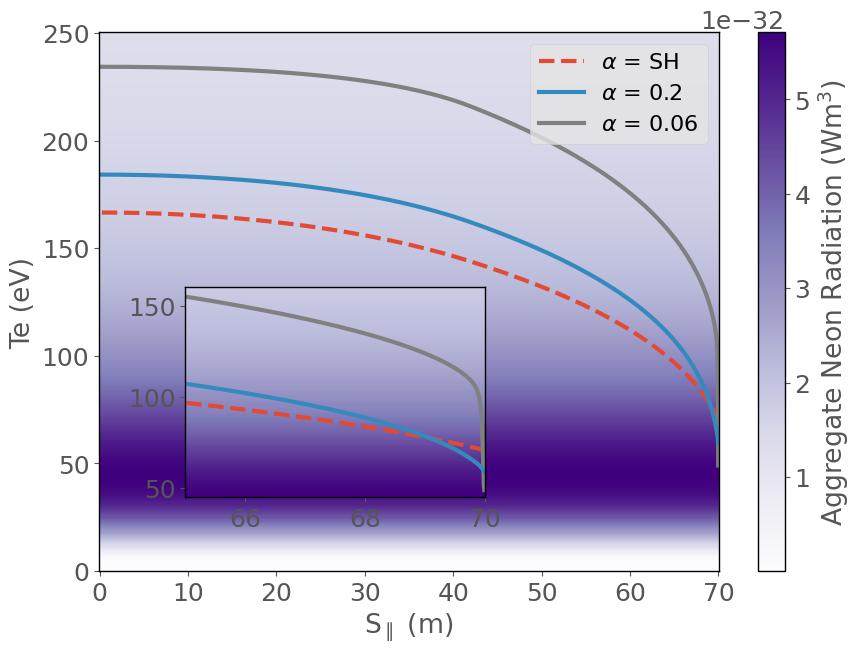

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Assuming the Neon_adas class is defined as in the previous discussion


# Sample data from the plot
# Replace these with the actual data


# Plot the colormap
fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(10, 7))

ax_inset = inset_axes(ax, width="30%", height="30%", loc='lower left',bbox_to_anchor=(0.2, 0.2, 1, 1), bbox_transform=fig.transFigure)


# Overlay the original line data
# Replace 'alpha_line_data' and 'sh_line_data' with your actual line data
# For example:

for i in ds['alpha'].unique():
    if i == 'SH' or i == 'SNB':
        linestyle = '--'
    else:
        linestyle = '-'
    for j in ds['neon_frac'].unique():
        if i not in ['SNB','0.1', '0.4']:  # Exclude alpha values of 0.1 and 0.4
            if j == 0.0:
                print(i)
                ax.plot(ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['y'], ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['Te'], 
                        label=r'$\alpha$' + f' = {i}', color=colors[i], linewidth=3, markersize=15, linestyle = linestyle)
                ax_inset.plot(ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['y'][-200:], ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['Te'][-200:], 
                        label=r'$\alpha$' + f' = {i}', color=colors[i], linewidth=3, markersize=15, linestyle = linestyle)


S_II = np.linspace(0, 70, 500)  # Spatial coordinate
T_e = np.linspace(0, 250, 500)  # Electron temperature

# Create a meshgrid for S_II and T_e
S_II_grid, T_e_grid = np.meshgrid(S_II, T_e)

# Evaluate the curve function on the meshgrid
Z = neon_adas_curve(T_e_grid)

cmap = 'Purples'

norm = Normalize(vmin=np.min(Z), vmax=np.max(Z))
ax.pcolormesh(S_II_grid, T_e_grid, Z, shading='auto', norm=norm, cmap=cmap)
fig.colorbar(label=r'Aggregate Neon Radiation (Wm$^{3}$)', mappable=ax.collections[0])


S_II = np.linspace(64, 70, 500)  # Spatial coordinate
T_e = np.linspace(0, 250, 500)  # Electron temperature



# Create a meshgrid for S_II and T_e
S_II_grid, T_e_grid = np.meshgrid(S_II, T_e)
Z = neon_adas_curve(T_e_grid)

norm = Normalize(vmin=np.min(Z), vmax=np.max(Z))

ax_inset.pcolormesh(S_II_grid, T_e_grid, Z, shading='auto', norm=norm, cmap=cmap)
ax_inset.set_xbound(65,70)
ax_inset.set_ybound(45,160)

# colorbar.set_cmap('plasma')


# Get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Desired order (SH, 0.2, 0.06)
order = [0, 2, 1]

# Reorder handles and labels
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]



# Set labels and title as needed
ax.set_xlabel(r'S$_\parallel$ (m)')
ax.set_ylabel(r'Te (eV)')
ax.legend(handles, labels, loc = 'upper right')
plt.show()


[[0.00011325028312570782, 0.01, 0.020045300113250283, 0.030011325028312573, 0.039920724801812, 0.04988674971687429], [-0.13451406700929414, 0.0, -0.13451406700929414, 0.13451406700929414, 0, 0.13451406700929414]]


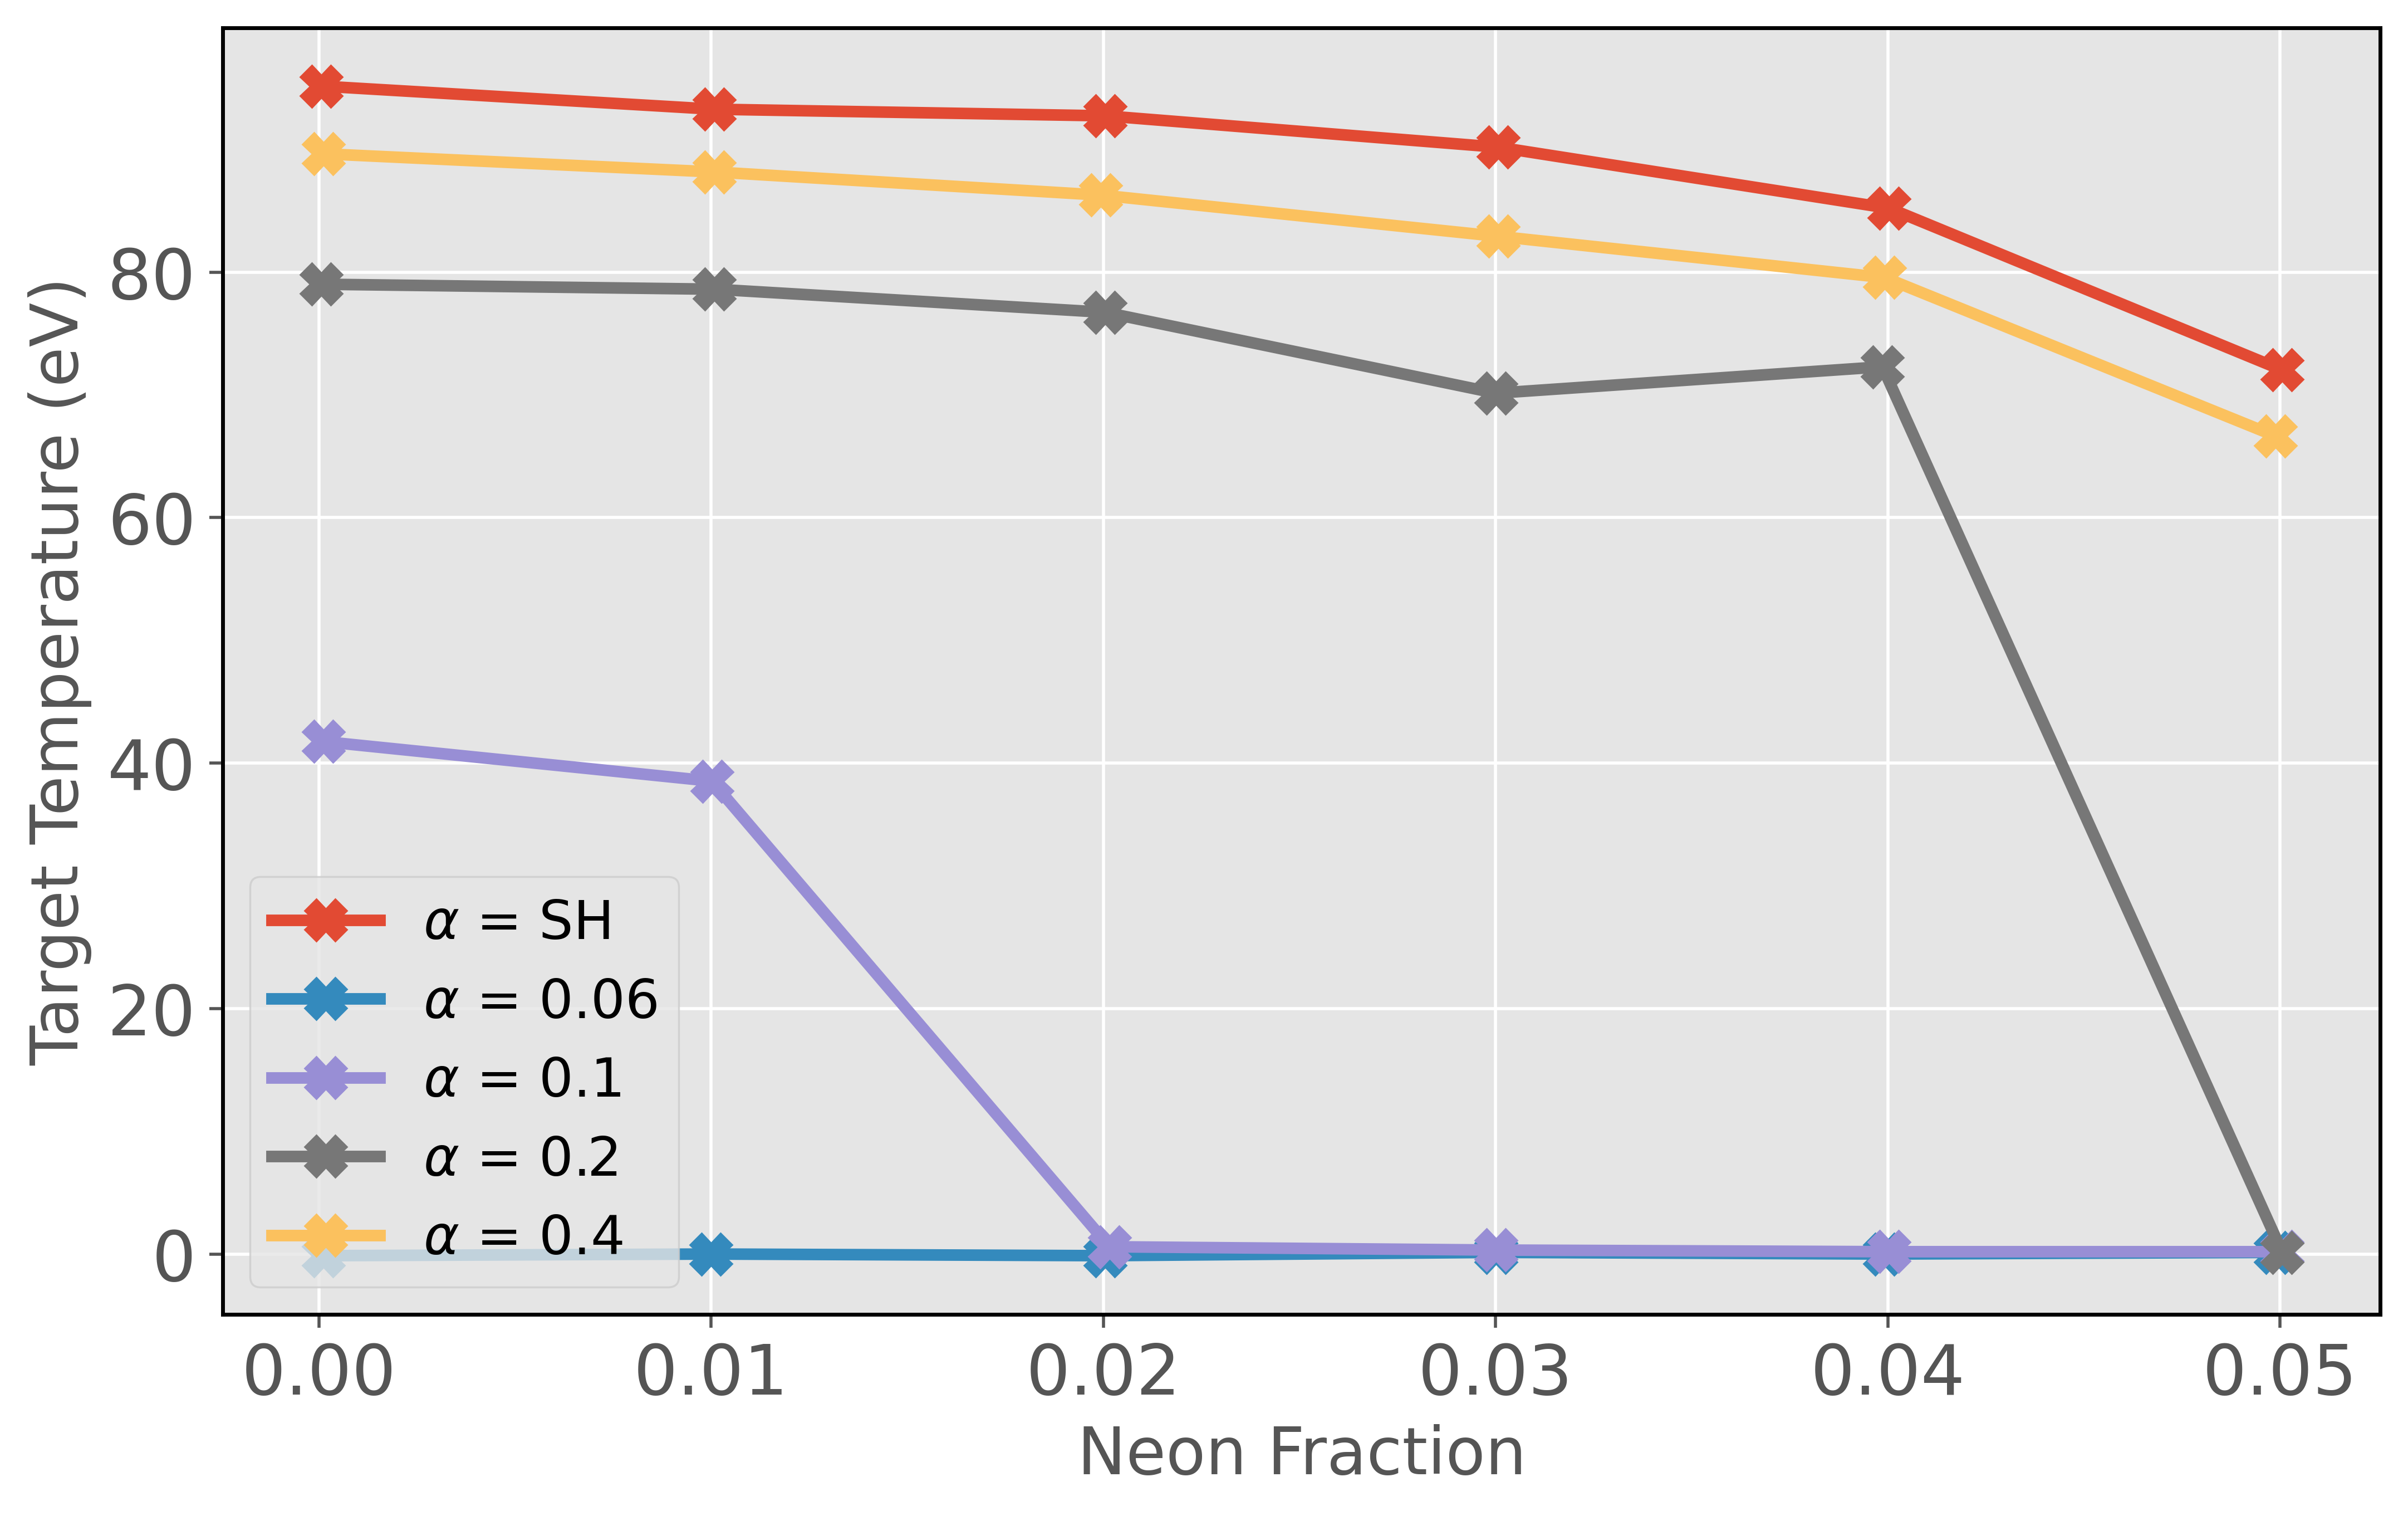

In [ ]:
import matplotlib.pyplot as plt
import numpy as np




x = [0.00011325028312570782,0.01, 0.020045300113250283, 0.030011325028312573, 0.039920724801812, 0.04988674971687429]
y = [-0.13451406700929414,0.0, -0.13451406700929414, 0.13451406700929414, 0, 0.13451406700929414]
alpha006 = [x,y]

x = [0.00011325028312570782, 0.010022650056625141, 0.020158550396375992, 0.030011325028312573, 0.040033975084937716, 0.05005662514156285]
y = [41.755408984975645, 38.52707137675259, 0.5941044801316406, 0.3250763461130523, 0.19056227910375817, 0.19056227910375817]
alpha01 = [x,y]

x = [0.00005662514156285391, 0.010079275198187996, 0.020045300113250283, 0.030011325028312573, 0.039864099660249154, 0.05005662514156285]
y = [79.01580554655013, 78.61226334552224, 76.72906640739212, 70.1378771239367, 72.29010219608541, 0.13451406700929414]
alpha02 = [x,y]

x = [0.00011325028312570782, 0.010079275198187996, 0.019932049830124577, 0.030067950169875426, 0.039920724801812, 0.04988674971687429]
y = [89.64241684028435, 88.16276210318212, 86.279565165052, 82.91671348981966, 79.5538618145873, 66.64051138169506]
alpha04 = [x,y]

x = [0.00005662514156285391, 0.010079275198187996, 0.020045300113250283, 0.030067950169875426, 0.040033975084937716, 0.05005662514156285]
y = [95.15749358766541, 93.2742966495353, 92.73624038149812, 90.18047310832154, 85.20345262897766, 72.02107406206683]
alpha_none = [x,y]

print(alpha006)



plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams.update({'font.size': 14})
linewidth = 3
markersize = 10

plt.figure(figsize=(10, 6), dpi = 500)
plt.plot(alpha_none[0], alpha_none[1], marker = 'X', label = r'$\alpha$ = SH', markersize = markersize, linewidth = linewidth)
plt.plot(alpha006[0], alpha006[1], marker = 'X', label = r'$\alpha$ = 0.06', markersize = markersize, linewidth = linewidth)
plt.plot(alpha01[0], alpha01[1], marker = 'X', label = r'$\alpha$ = 0.1', markersize = markersize, linewidth = linewidth)
plt.plot(alpha02[0], alpha02[1], marker = 'X', label = r'$\alpha$ = 0.2', markersize = markersize, linewidth = linewidth)  
plt.plot(alpha04[0], alpha04[1], marker = 'X', label = r'$\alpha$ = 0.4', markersize = markersize, linewidth = linewidth)
plt.ylabel('Target Temperature (eV)')
plt.xlabel('Neon Fraction')
plt.legend(loc = 'lower left')
# plt.savefig('myles_data.png', dpi = 300)
plt.show()

Text(0, 0.5, 'T$_e$ (eV)')

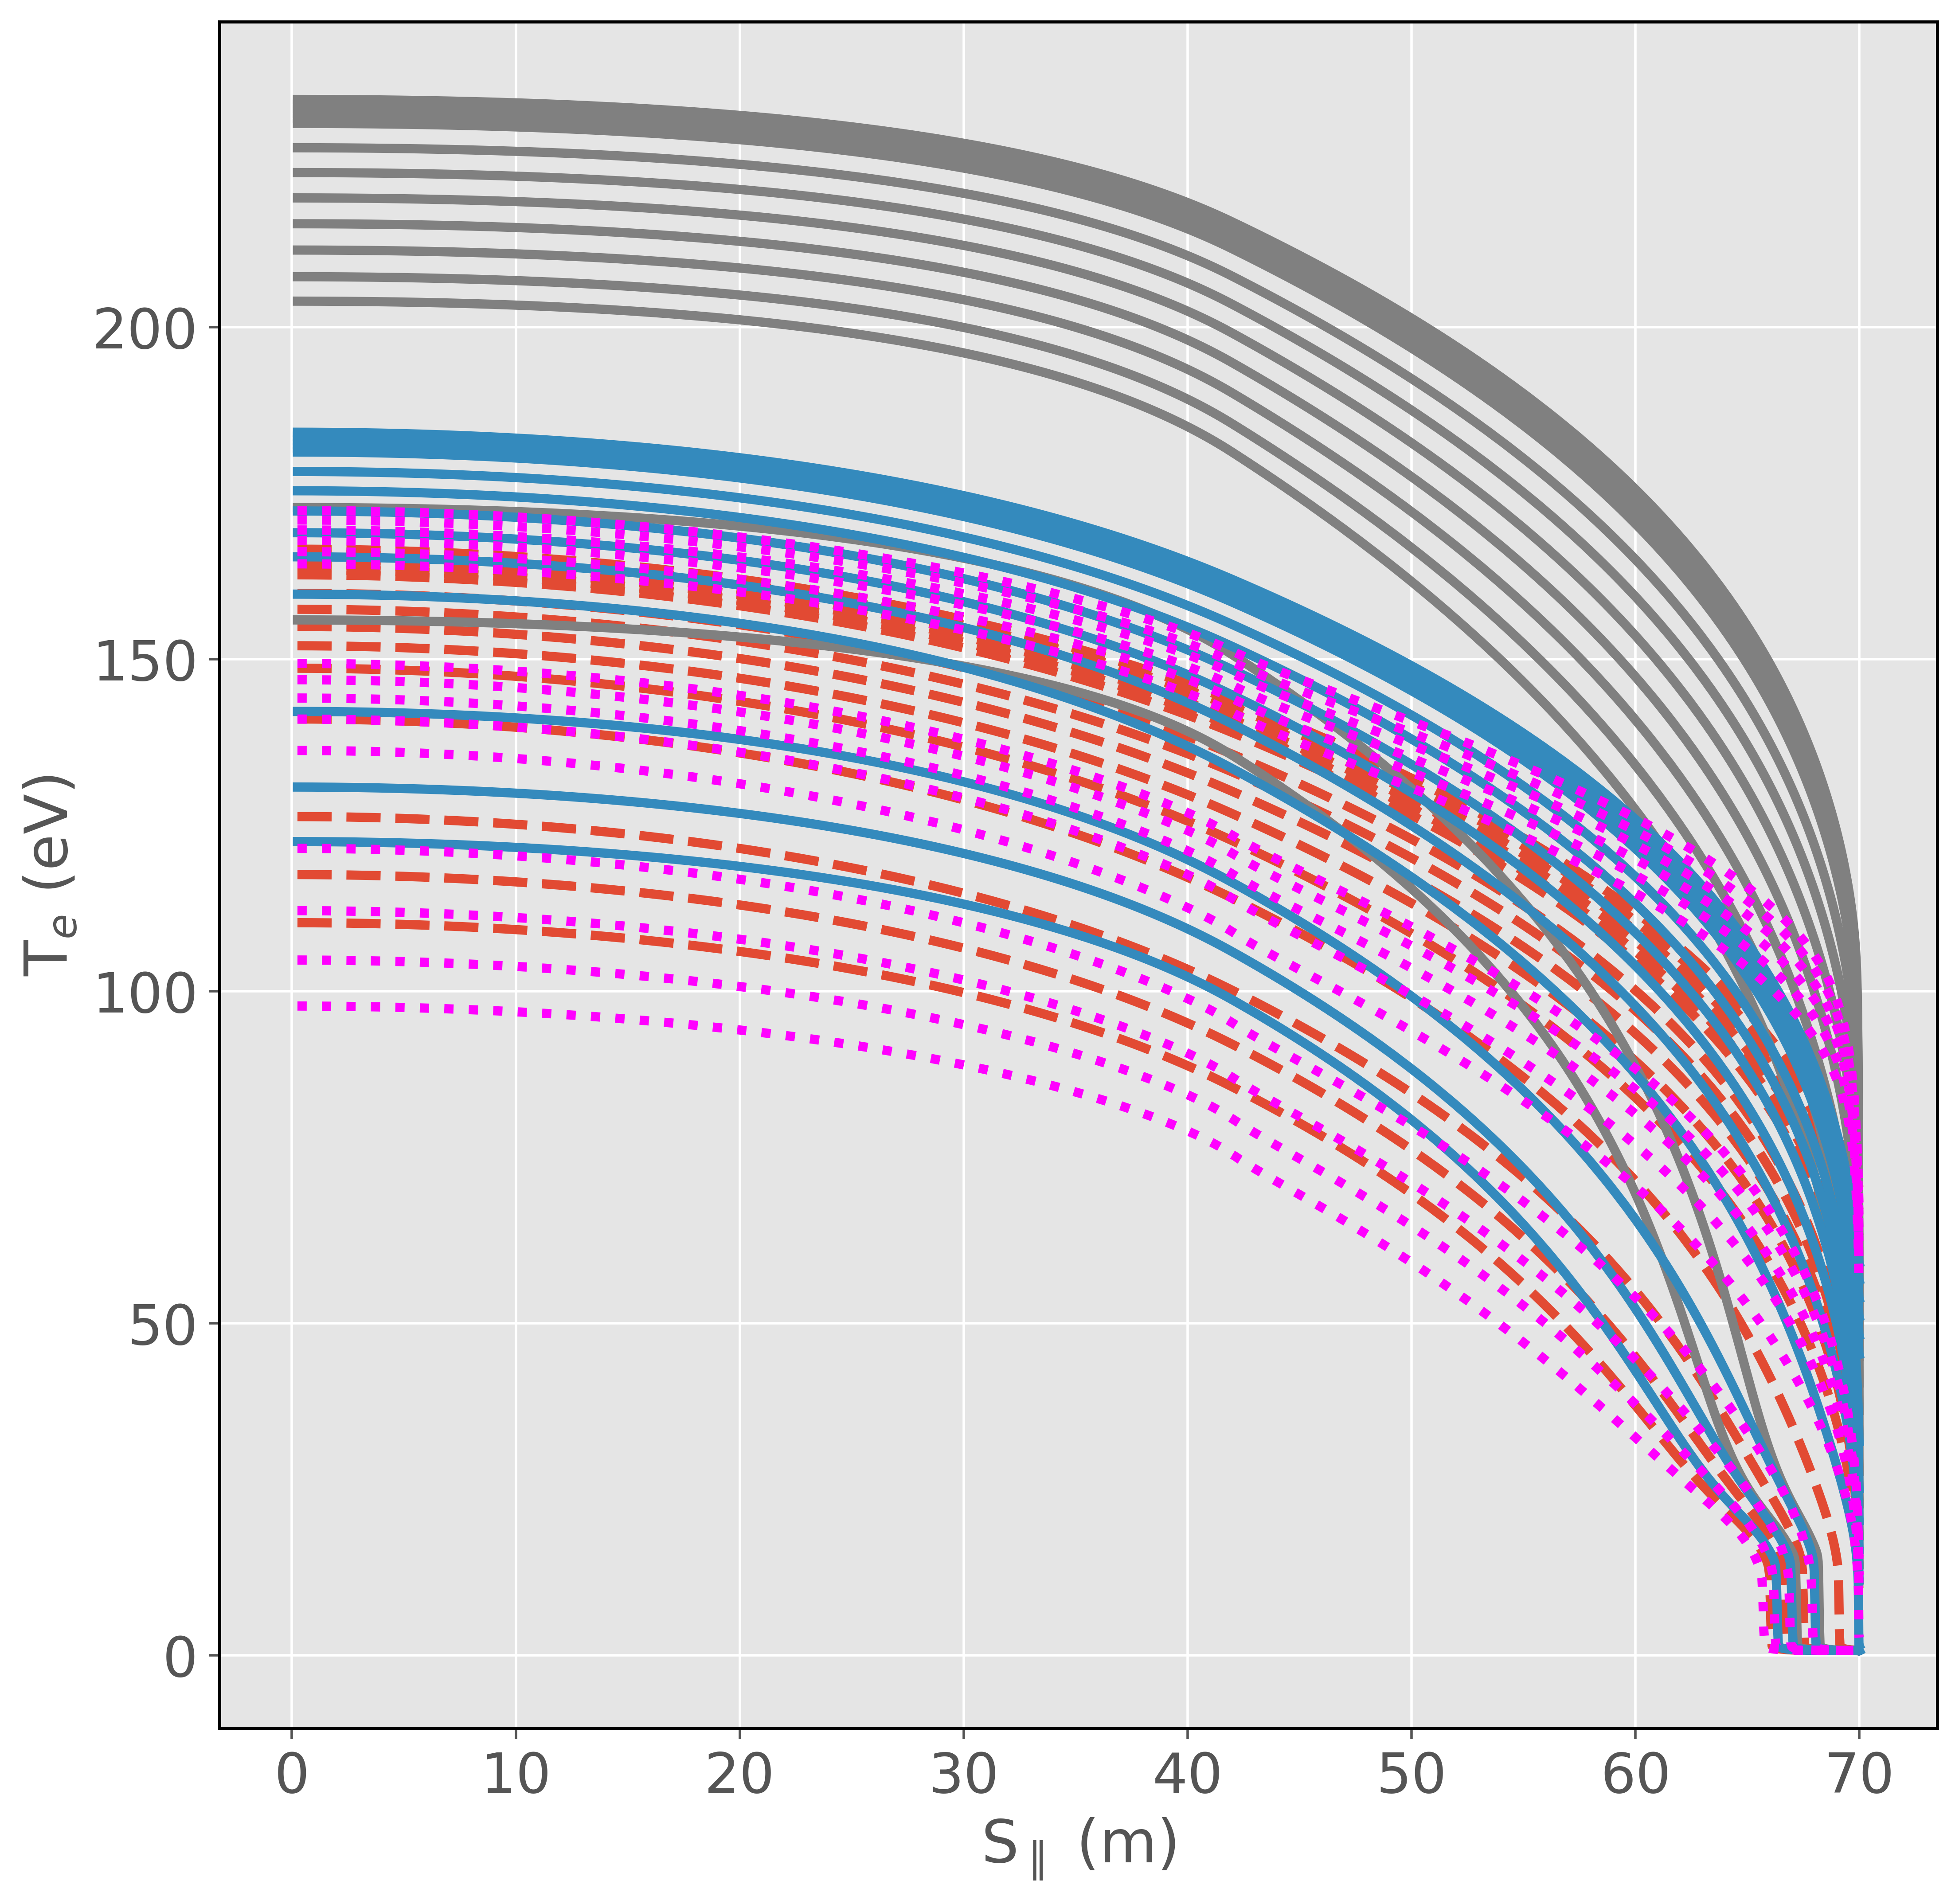

In [70]:
ds = pd.read_pickle('/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/flux_limit/Flux_limiter_detachment_ITER_final.pickle')

plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi = 500)
# ax_inset = inset_axes(ax, width="30%", height="30%", loc='lower left',bbox_to_anchor=(0.2, 0.2, 1, 1), bbox_transform=fig.transFigure)


for i in ds['alpha'].unique():
    if i not in ['0.1','0.4']:  # Exclude plotting for alpha = 'SNB'
        if i == 'SH':
            linestyle = '--'
        elif i == 'SNB':
            linestyle = ':'
        else:
            linestyle = '-'

        for j in df_alpha['neon_frac'].unique():
            # print(df_alpha['neon_frac'].unique())
            if j < 0.11:

                x = ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['y']
                Te = ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['Te']

                ax.plot(x,Te,linewidth=linewidth,label=r'$\alpha$' + f' = {i}', color = colors[i], linestyle = linestyle)
                # Get handles and labels
                handles, labels = plt.gca().get_legend_handles_labels()

                # Desired order (SH, 0.2, 0.06)
                order = [0, 2, 1, 3]

                # Reorder handles and labels
                handles = [handles[i] for i in order]
                labels = [labels[i] for i in order]


                ax.set_xlabel(r'S$_\parallel$ (m)')
                ax.set_ylabel(r'T$_e$ (eV)')
                ax.legend(handles, labels, loc = 'upper right')








/tmp/ipykernel_288557/2492804816.py:68: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (3000, 1800) to (3008, 1808) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[rawvideo @ 0x6b47540] Stream #0: not enough frames to estimate rate; consider increasing probesize


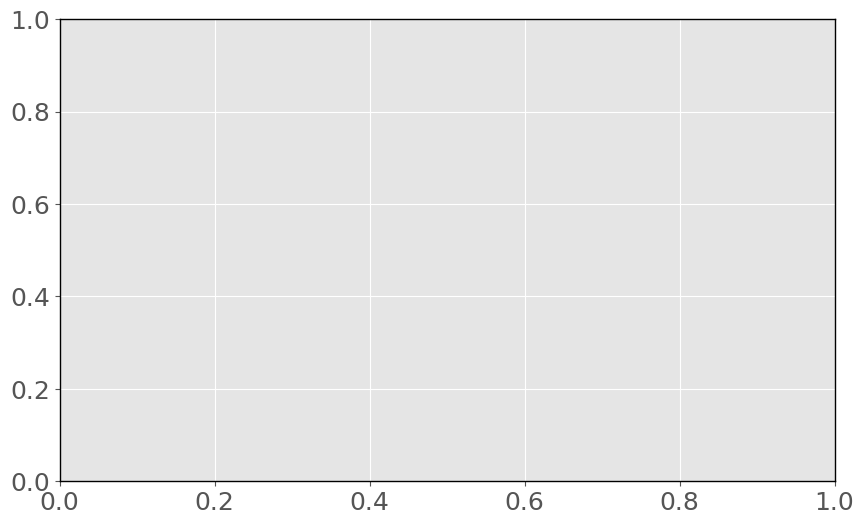

In [79]:
import matplotlib.pyplot as plt
import imageio
import os

# Assuming ds is your DataFrame with all the necessary data.
neon_vals = ds['neon_frac'].unique()  # Use unique neon_frac values from your DataFrame.
image_files = []  # To store the file paths of the plots

plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams.update({'font.size': 16})

colors = {
    'SH': '#E24A33',
    '0.2': '#348ABD',
    '0.1': '#988ED5',
    '0.06': 'grey',
    '0.3': '#777777',
    '0.4': '#FBC15E',
    'SNB': 'magenta'
}

fig, ax = plt.subplots(figsize=(10, 6))

for j in neon_vals:
    if j < 0.11:
        for i in ds['alpha'].unique():
            if i not in ['0.1', '0.4']:  # Exclude plotting for alpha = 'SNB'
                if i == 'SH':
                    linestyle = '--'
                elif i == 'SNB':
                    linestyle = ':'
                else:
                    linestyle = '-'

                x = ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['y']
                Te = ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['Te']

                ax.plot(x, Te, linewidth=linewidth, label=r'$\alpha$' + f' = {i}', color=colors.get(i, 'black'), linestyle=linestyle)

        # Get handles and labels
        handles, labels = plt.gca().get_legend_handles_labels()

        # Desired order (SH, 0.2, 0.06)
        order = [0, 2, 1, 3]  # Adjust the order based on your labels

        # Reorder handles and labels
        handles = [handles[i] for i in order if i < len(handles)]
        labels = [labels[i] for i in order if i < len(labels)]

        ax.set_xlabel(r'S$_\parallel$ (m)')
        ax.set_ylabel(r'T$_e$ (eV)')
        ax.legend(handles, labels, loc='upper right')
        ax.set_title(f'Plot for neon_frac = {j}')

        # Save each figure as an image
        filename = f'plot_neon_val_{j:.3f}.png'
        plt.savefig(filename, dpi = 300)
        image_files.append(filename)
        ax.clear()  # Clear the axis for the next plot

# Create an MP4 file from the saved images
with imageio.get_writer('power_loss_analysis.mp4', mode='I', fps=2, codec='libx264', bitrate='5000k') as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)

# Optionally, clean up by deleting the individual image files if desired
# for filename in image_files:
#     os.remove(filename)



/tmp/ipykernel_288557/1305855089.py:121: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (6000, 1800) to (6000, 1808) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[rawvideo @ 0x6022540] Stream #0: not enough frames to estimate rate; consider increasing probesize


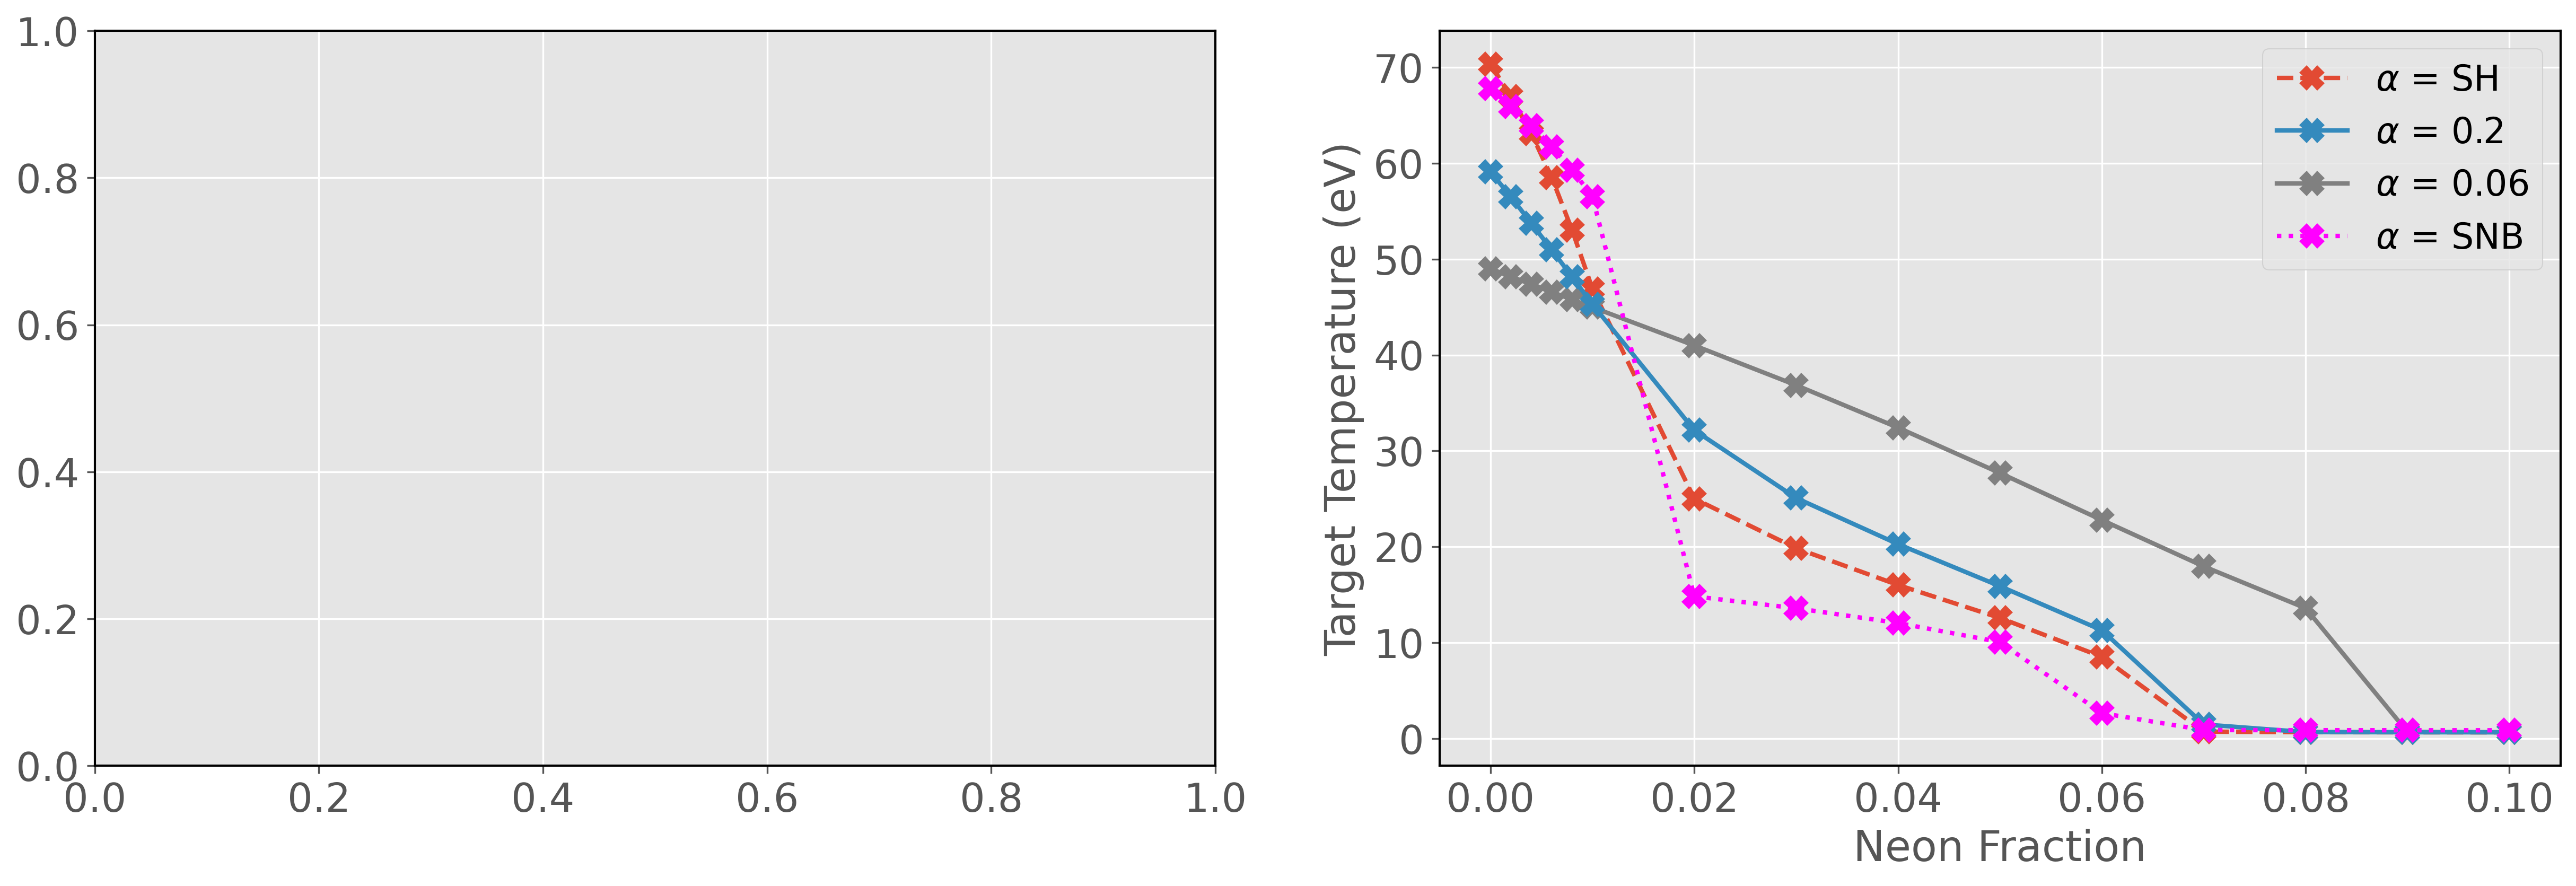

In [87]:
import matplotlib.pyplot as plt
import imageio
import os

# Assuming ds is your DataFrame with all the necessary data.
neon_vals = ds['neon_frac'].unique()  # Use unique neon_frac values from your DataFrame.
image_files = []  # To store the file paths of the plots

plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams.update({'font.size': 16})

colors = {
    'SH': '#E24A33',
    '0.2': '#348ABD',
    '0.1': '#988ED5',
    '0.06': 'grey',
    '0.3': '#777777',
    '0.4': '#FBC15E',
    'SNB': 'magenta'
}

# Prepare the second plot data
fig, axes = plt.subplots(1, 2, figsize=(20, 6), dpi=300)

# Collect data for the second plot
target_temp_data = {}
for i in ds['alpha'].unique():
    if i not in ['0.1', '0.4']:  # Exclude plotting for alpha = 'SNB'
        target_temp_list = []
        neon_frac_list = []
        df_alpha = ds[ds['alpha'] == f'{i}']
        if i == 'SH':
            linestyle = '--'
        elif i == 'SNB':
            linestyle = ':'
        else:
            linestyle = '-'

        for j in df_alpha['neon_frac'].unique():
            if j < 0.11:
                try:
                    target_temp_list.append(ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['target_temp'].values[-1])
                except:
                    continue
                neon_frac_list.append(j)
        target_temp_data[i] = (neon_frac_list, target_temp_list)
        axes[1].plot(neon_frac_list, target_temp_list, linewidth=linewidth, markersize=markersize, marker='X', label=r'$\alpha$' + f' = {i}', color=colors.get(i, 'black'), linestyle=linestyle)

axes[1].set_xlabel('Neon Fraction')
axes[1].set_ylabel('Target Temperature (eV)')

# Set the outline color to black
for spine in axes[1].spines.values():
    spine.set_edgecolor('black')

# Get handles and labels for the second plot
handles, labels = axes[1].get_legend_handles_labels()

# Desired order (SH, 0.2, 0.06)
order = [0, 2, 1, 3]  # Adjust the order based on your labels

# Reorder handles and labels
handles = [handles[i] for i in order if i < len(handles)]
labels = [labels[i] for i in order if i < len(labels)]

# Create the legend with the new order
axes[1].legend(handles, labels, loc='upper right')

# Loop for the first plot and update both plots
for j in neon_vals:
    if j < 0.11:
        for i in ds['alpha'].unique():
            if i not in ['0.1', '0.4']:  # Exclude plotting for alpha = 'SNB'
                if i == 'SH':
                    linestyle = '--'
                elif i == 'SNB':
                    linestyle = ':'
                else:
                    linestyle = '-'

                x = ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['y']
                Te = ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['Te']

                axes[0].plot(x, Te, linewidth=linewidth, label=r'$\alpha$' + f' = {i}', color=colors.get(i, 'black'), linestyle=linestyle)

        # Get handles and labels for the first plot
        handles, labels = axes[0].get_legend_handles_labels()

        # Desired order (SH, 0.2, 0.06)
        order = [0, 2, 1]  # Adjust the order based on your labels

        # Reorder handles and labels
        handles = [handles[i] for i in order if i < len(handles)]
        labels = [labels[i] for i in order if i < len(labels)]

        axes[0].set_xlabel(r'S$_\parallel$ (m)')
        axes[0].set_ylabel(r'T$_e$ (eV)')
        axes[0].legend(handles, labels, loc='upper right')
        axes[0].set_title(f'Temperature Profile for neon_frac = {j}')

        # Add vertical line to the second plot
        red_line = axes[1].axvline(x=j, color='red', linestyle='--')

        # Save each figure as an image
        filename = f'plot_neon_val_{j:.3f}.png'
        plt.savefig(filename, dpi=300)  # Adjust DPI for higher resolution
        image_files.append(filename)

        # Clear the first plot for the next iteration
        axes[0].clear()
        # Remove the vertical line from the second plot
        red_line.remove()

# Create an MP4 file from the saved images with higher resolution
with imageio.get_writer('power_loss_analysis.mp4', mode='I', fps=1, codec='libx264', bitrate='5000k') as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)

# Optionally, clean up by deleting the individual image files if desired
# for filename in image_files:
#     os.remove(filename)

/tmp/ipykernel_1398790/2082287714.py:4: RuntimeWarning: divide by zero encountered in log
  logT = np.log(Te)


/tmp/ipykernel_1398790/4075062375.py:161: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (6000, 1800) to (6000, 1808) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[rawvideo @ 0x5c30540] Stream #0: not enough frames to estimate rate; consider increasing probesize


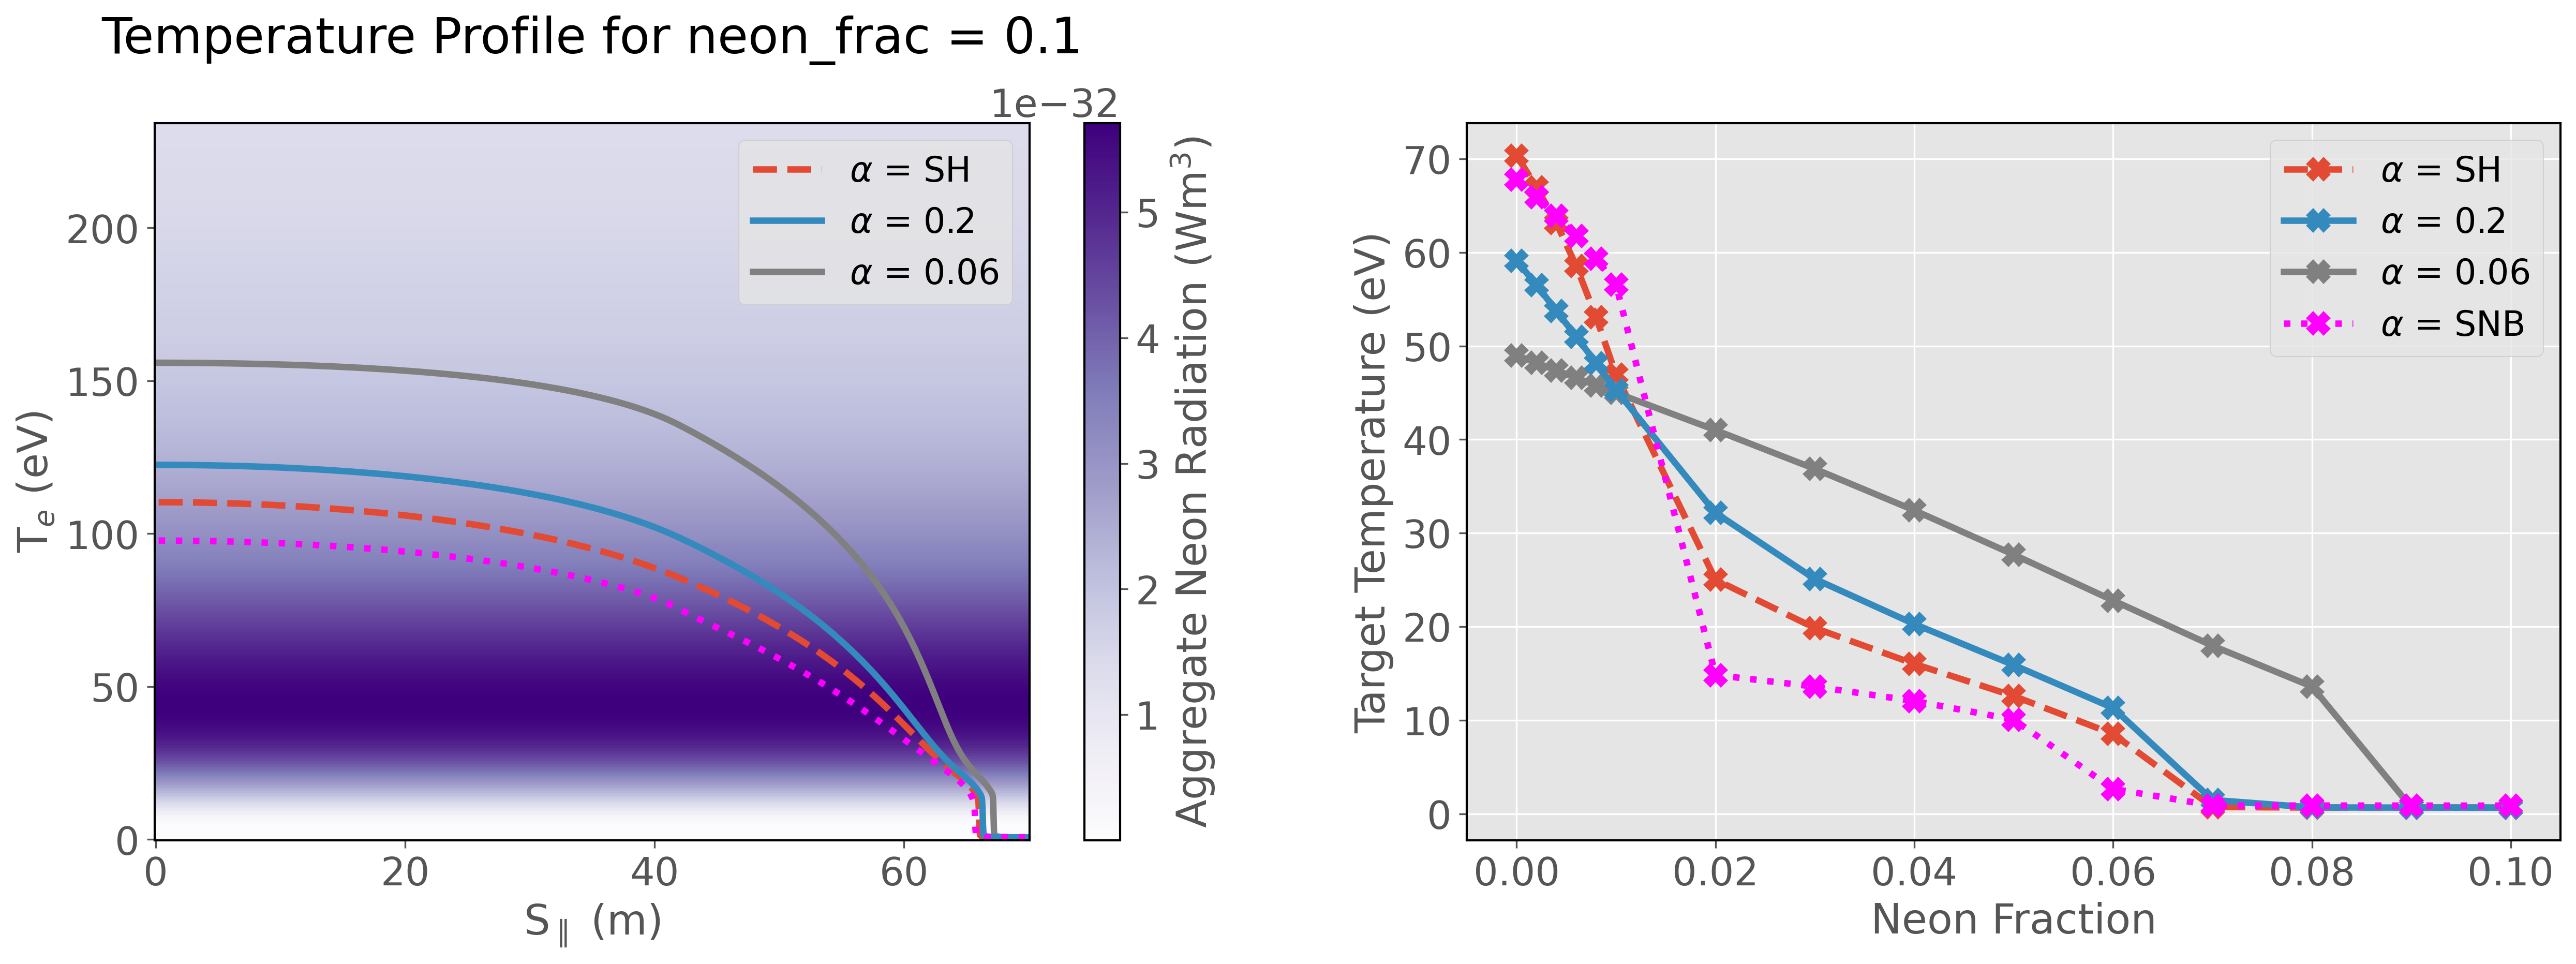

In [7]:
import matplotlib.pyplot as plt
import imageio
import os
import numpy as np
from matplotlib.colors import Normalize

# Assuming ds is your DataFrame with all the necessary data.
neon_vals = ds['neon_frac'].unique()  # Use unique neon_frac values from your DataFrame.
image_files = []  # To store the file paths of the plots

plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams.update({'font.size': 16})

colors = {
    'SH': '#E24A33',
    '0.2': '#348ABD',
    '0.1': '#988ED5',
    '0.06': 'grey',
    '0.3': '#777777',
    '0.4': '#FBC15E',
    'SNB': 'magenta'
}


# Prepare the second plot data
fig, axes = plt.subplots(1, 2, figsize=(20, 6), dpi=300)



# Spatial coordinate and electron temperature
S_II = np.linspace(0, 70, 500)
T_e = np.linspace(0, 250, 500)

# Create a meshgrid for S_II and T_e
S_II_grid, T_e_grid = np.meshgrid(S_II, T_e)

# Evaluate the curve function on the meshgrid
Z = neon_adas_curve(T_e_grid)


# Plot the colormap on ax[0]
cmap = 'Purples'
norm = Normalize(vmin=np.min(Z), vmax=np.max(Z))
colormap = axes[0].pcolormesh(S_II_grid, T_e_grid, Z, shading='auto', norm=norm, cmap=cmap)
cbar = fig.colorbar(colormap, ax=axes[0], label=r'Aggregate Neon Radiation (Wm$^{3}$)')

# Determine y-axis maximum limit for neon_frac = 0.0
y_max = None
if 0.0 in neon_vals:
    for i in ds['alpha'].unique():
        if i not in ['0.1', '0.4']:
            y_vals = ds[(ds['alpha'] == i) & (ds['neon_frac'] == 0.0)]['Te']
            if y_vals.size > 0 and (y_max is None or y_vals.max() > y_max):
                y_max = y_vals.max()

# Collect data for the second plot
target_temp_data = {}
for i in ds['alpha'].unique():
    if i not in ['0.1', '0.4']:  # Exclude plotting for alpha = 'SNB'
        target_temp_list = []
        neon_frac_list = []
        df_alpha = ds[ds['alpha'] == f'{i}']
        if i == 'SH':
            linestyle = '--'
        elif i == 'SNB':
            linestyle = ':'
        else:
            linestyle = '-'

        for j in df_alpha['neon_frac'].unique():
            if j < 0.11:
                try:
                    target_temp_list.append(ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['target_temp'].values[-1])
                except:
                    continue
                neon_frac_list.append(j)
        target_temp_data[i] = (neon_frac_list, target_temp_list)
        axes[1].plot(neon_frac_list, target_temp_list, linewidth=linewidth, markersize=markersize, marker='X', label=r'$\alpha$' + f' = {i}', color=colors.get(i, 'black'), linestyle=linestyle)

axes[1].set_xlabel('Neon Fraction')
axes[1].set_ylabel('Target Temperature (eV)')

# Set the outline color to black
for spine in axes[1].spines.values():
    spine.set_edgecolor('black')

# Get handles and labels for the second plot
handles, labels = axes[1].get_legend_handles_labels()

# Desired order (SH, 0.2, 0.06)
order = [0, 2, 1, 3]  # Adjust the order based on your labels

# Reorder handles and labels
handles = [handles[i] for i in order if i < len(handles)]
labels = [labels[i] for i in order if i < len(labels)]

# Create the legend with the new order
axes[1].legend(handles, labels, loc='upper right')

# Loop for the first plot and update both plots
for j in neon_vals:
    if j < 0.11:
        # Clear only the line plots in the first plot
        for line in axes[0].lines:
            line.remove()

        for i in ds['alpha'].unique():
            if i not in ['0.1', '0.4']:  # Exclude plotting for alpha = 'SNB'
                if i == 'SH':
                    linestyle = '--'
                elif i == 'SNB':
                    linestyle = ':'
                else:
                    linestyle = '-'

                x = ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['y']
                Te = ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['Te']

                axes[0].plot(x, Te, linewidth=linewidth, label=r'$\alpha$' + f' = {i}', color=colors.get(i, 'black'), linestyle=linestyle)

        # Get handles and labels for the first plot
        handles, labels = axes[0].get_legend_handles_labels()

        # Desired order (SH, 0.2, 0.06)
        order = [0, 2, 1, 3]  # Adjust the order based on your labels

        # Reorder handles and labels
        handles = [handles[i] for i in order if i < len(handles)]
        labels = [labels[i] for i in order if i < len(labels)]

        axes[0].set_xlabel(r'S$_\parallel$ (m)')
        axes[0].set_ylabel(r'T$_e$ (eV)')
        axes[0].legend(handles, labels, loc='upper right')
        axes[0].set_title(f'Temperature Profile for neon_frac = {j}\n')
        
        # Set the y-axis maximum limit to the determined scale, let the minimum adjust automatically
        if y_max is not None:
            axes[0].set_ylim(top=y_max)

        # Add vertical line to the second plot
        red_line = axes[1].axvline(x=j, color='red', linestyle='--')

        # Draw the updated figure
        plt.draw()
        
        # Save each figure as an image
        filename = f'plot_neon_val_{j:.3f}.png'
        plt.savefig(filename, dpi=300)  # Adjust DPI for higher resolution
        image_files.append(filename)

        # Remove the vertical line from the second plot
        red_line.remove()

# Create an MP4 file from the saved images with higher resolution
with imageio.get_writer('power_loss_analysis_with_gradient.mp4', mode='I', fps=0.5, codec='libx264', bitrate='5000k') as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)

# Optionally, clean up by deleting the individual image files if desired
for filename in image_files:
    os.remove(filename)

/tmp/ipykernel_1953774/2082287714.py:4: RuntimeWarning: divide by zero encountered in log
  logT = np.log(Te)


NameError: name 'Normalize' is not defined

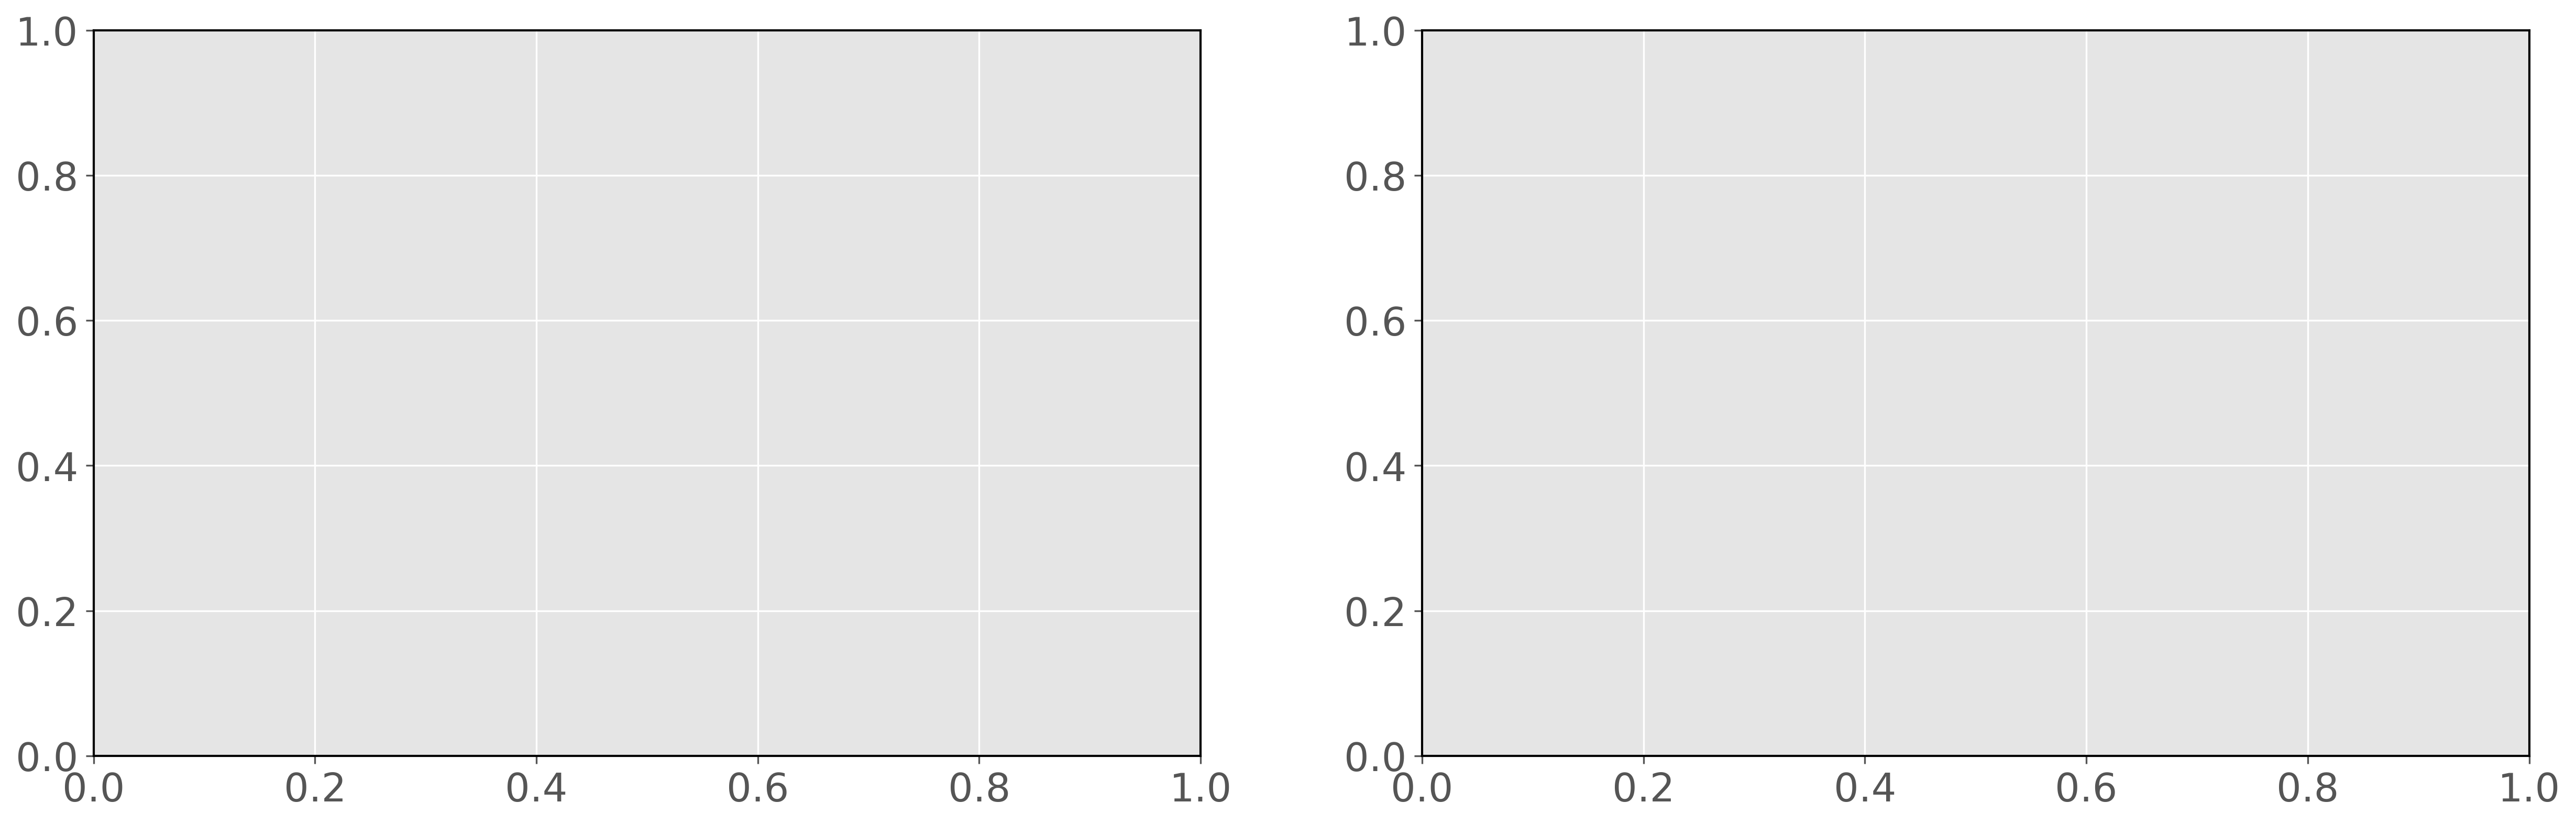

In [5]:
import matplotlib.pyplot as plt
import imageio
import os

# Assuming ds is your DataFrame with all the necessary data.
neon_vals = ds['neon_frac'].unique()  # Use unique neon_frac values from your DataFrame.
image_files = []  # To store the file paths of the plots

plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams.update({'font.size': 16})

colors = {
    'SH': '#E24A33',
    '0.2': '#348ABD',
    '0.1': '#988ED5',
    '0.06': 'grey',
    '0.3': '#777777',
    '0.4': '#FBC15E',
    'SNB': 'magenta'
}


# Prepare the second plot data
fig, axes = plt.subplots(1, 2, figsize=(20, 6), dpi=300)



# Spatial coordinate and electron temperature
S_II = np.linspace(0, 70, 500)
T_e = np.linspace(0, 250, 500)

# Create a meshgrid for S_II and T_e
S_II_grid, T_e_grid = np.meshgrid(S_II, T_e)

# Evaluate the curve function on the meshgrid
Z = neon_adas_curve(T_e_grid)

# Plot the colormap on ax[0]
cmap = 'Purples'
norm = Normalize(vmin=np.min(Z), vmax=np.max(Z))
colormap = axes[0].pcolormesh(S_II_grid, T_e_grid, Z, shading='auto', norm=norm, cmap=cmap)
cbar = fig.colorbar(colormap, ax=axes[0], label=r'Aggregate Neon Radiation (Wm$^{3}$)')

# Determine y-axis maximum limit for neon_frac = 0.0
y_max = None
if 0.0 in neon_vals:
    for i in ds['alpha'].unique():
        if i not in ['0.1', '0.4']:
            y_vals = ds[(ds['alpha'] == i) & (ds['neon_frac'] == 0.0)]['Te']
            if y_vals.size > 0 and (y_max is None or y_vals.max() > y_max):
                y_max = y_vals.max()

# Collect data for the second plot
target_temp_data = {}
for i in ds['alpha'].unique():
    if i not in ['0.1', '0.4']:  # Exclude plotting for alpha = 'SNB'
        target_temp_list = []
        neon_frac_list = []
        df_alpha = ds[ds['alpha'] == f'{i}']
        if i == 'SH':
            linestyle = '--'
        elif i == 'SNB':
            linestyle = ':'
        else:
            linestyle = '-'

        for j in df_alpha['neon_frac'].unique():
            if j < 0.11:
                try:
                    target_temp_list.append(ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['target_temp'].values[-1])
                except:
                    continue
                neon_frac_list.append(j)
        target_temp_data[i] = (neon_frac_list, target_temp_list)
        axes[1].plot(neon_frac_list, target_temp_list, linewidth=linewidth, markersize=markersize, marker='X', label=r'$\alpha$' + f' = {i}', color=colors.get(i, 'black'), linestyle=linestyle)

axes[1].set_xlabel('Neon Fraction')
axes[1].set_ylabel('Target Temperature (eV)')

# Set the outline color to black
for spine in axes[1].spines.values():
    spine.set_edgecolor('black')

# Get handles and labels for the second plot
handles, labels = axes[1].get_legend_handles_labels()

# Desired order (SH, 0.2, 0.06)
order = [0, 2, 1, 3]  # Adjust the order based on your labels

# Reorder handles and labels
handles = [handles[i] for i in order if i < len(handles)]
labels = [labels[i] for i in order if i < len(labels)]

# Create the legend with the new order
axes[1].legend(handles, labels, loc='upper right')

# Loop for the first plot and update both plots
for j in neon_vals:
    if j < 0.11:
        # Clear only the line plots in the first plot
        while len(axes[0].lines) > 0:
            del axes[0].lines[0]

        for i in ds['alpha'].unique():
            if i not in ['0.1', '0.4']:  # Exclude plotting for alpha = 'SNB'
                if i == 'SH':
                    linestyle = '--'
                elif i == 'SNB':
                    linestyle = ':'
                else:
                    linestyle = '-'

                x = ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['y']
                Te = ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['Te']

                axes[0].plot(x, Te, linewidth=linewidth, label=r'$\alpha$' + f' = {i}', color=colors.get(i, 'black'), linestyle=linestyle)

        # Get handles and labels for the first plot
        handles, labels = axes[0].get_legend_handles_labels()

        # Desired order (SH, 0.2, 0.06)
        order = [0, 2, 1]  # Adjust the order based on your labels

        # Reorder handles and labels
        handles = [handles[i] for i in order if i < len(handles)]
        labels = [labels[i] for i in order if i < len(labels)]

        axes[0].set_xlabel(r'S$_\parallel$ (m)')
        axes[0].set_ylabel(r'T$_e$ (eV)')
        axes[0].legend(handles, labels, loc='upper right')
        axes[0].set_title(f'Temperature Profile for neon_frac = {j}')
        
        # Set the y-axis maximum limit to the determined scale, let the minimum adjust automatically
        if y_max is not None:
            axes[0].set_ylim(top=y_max)

        # Add vertical line to the second plot
        red_line = axes[1].axvline(x=j, color='red', linestyle='--')

        # Draw the updated figure
        plt.draw()
        
        # Save each figure as an image
        filename = f'plot_neon_val_{j:.3f}.png'
        plt.savefig(filename, dpi=300)  # Adjust DPI for higher resolution
        image_files.append(filename)

        # Remove the vertical line from the second plot
        red_line.remove()

# Create an FLV file from the saved images with higher resolution
with imageio.get_writer('power_loss_analysis.mp4', mode='I', fps=2, codec='flv') as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)

# Optionally, clean up by deleting the individual image files if desired
# for filename in image_files:
#     os.remove(filename)

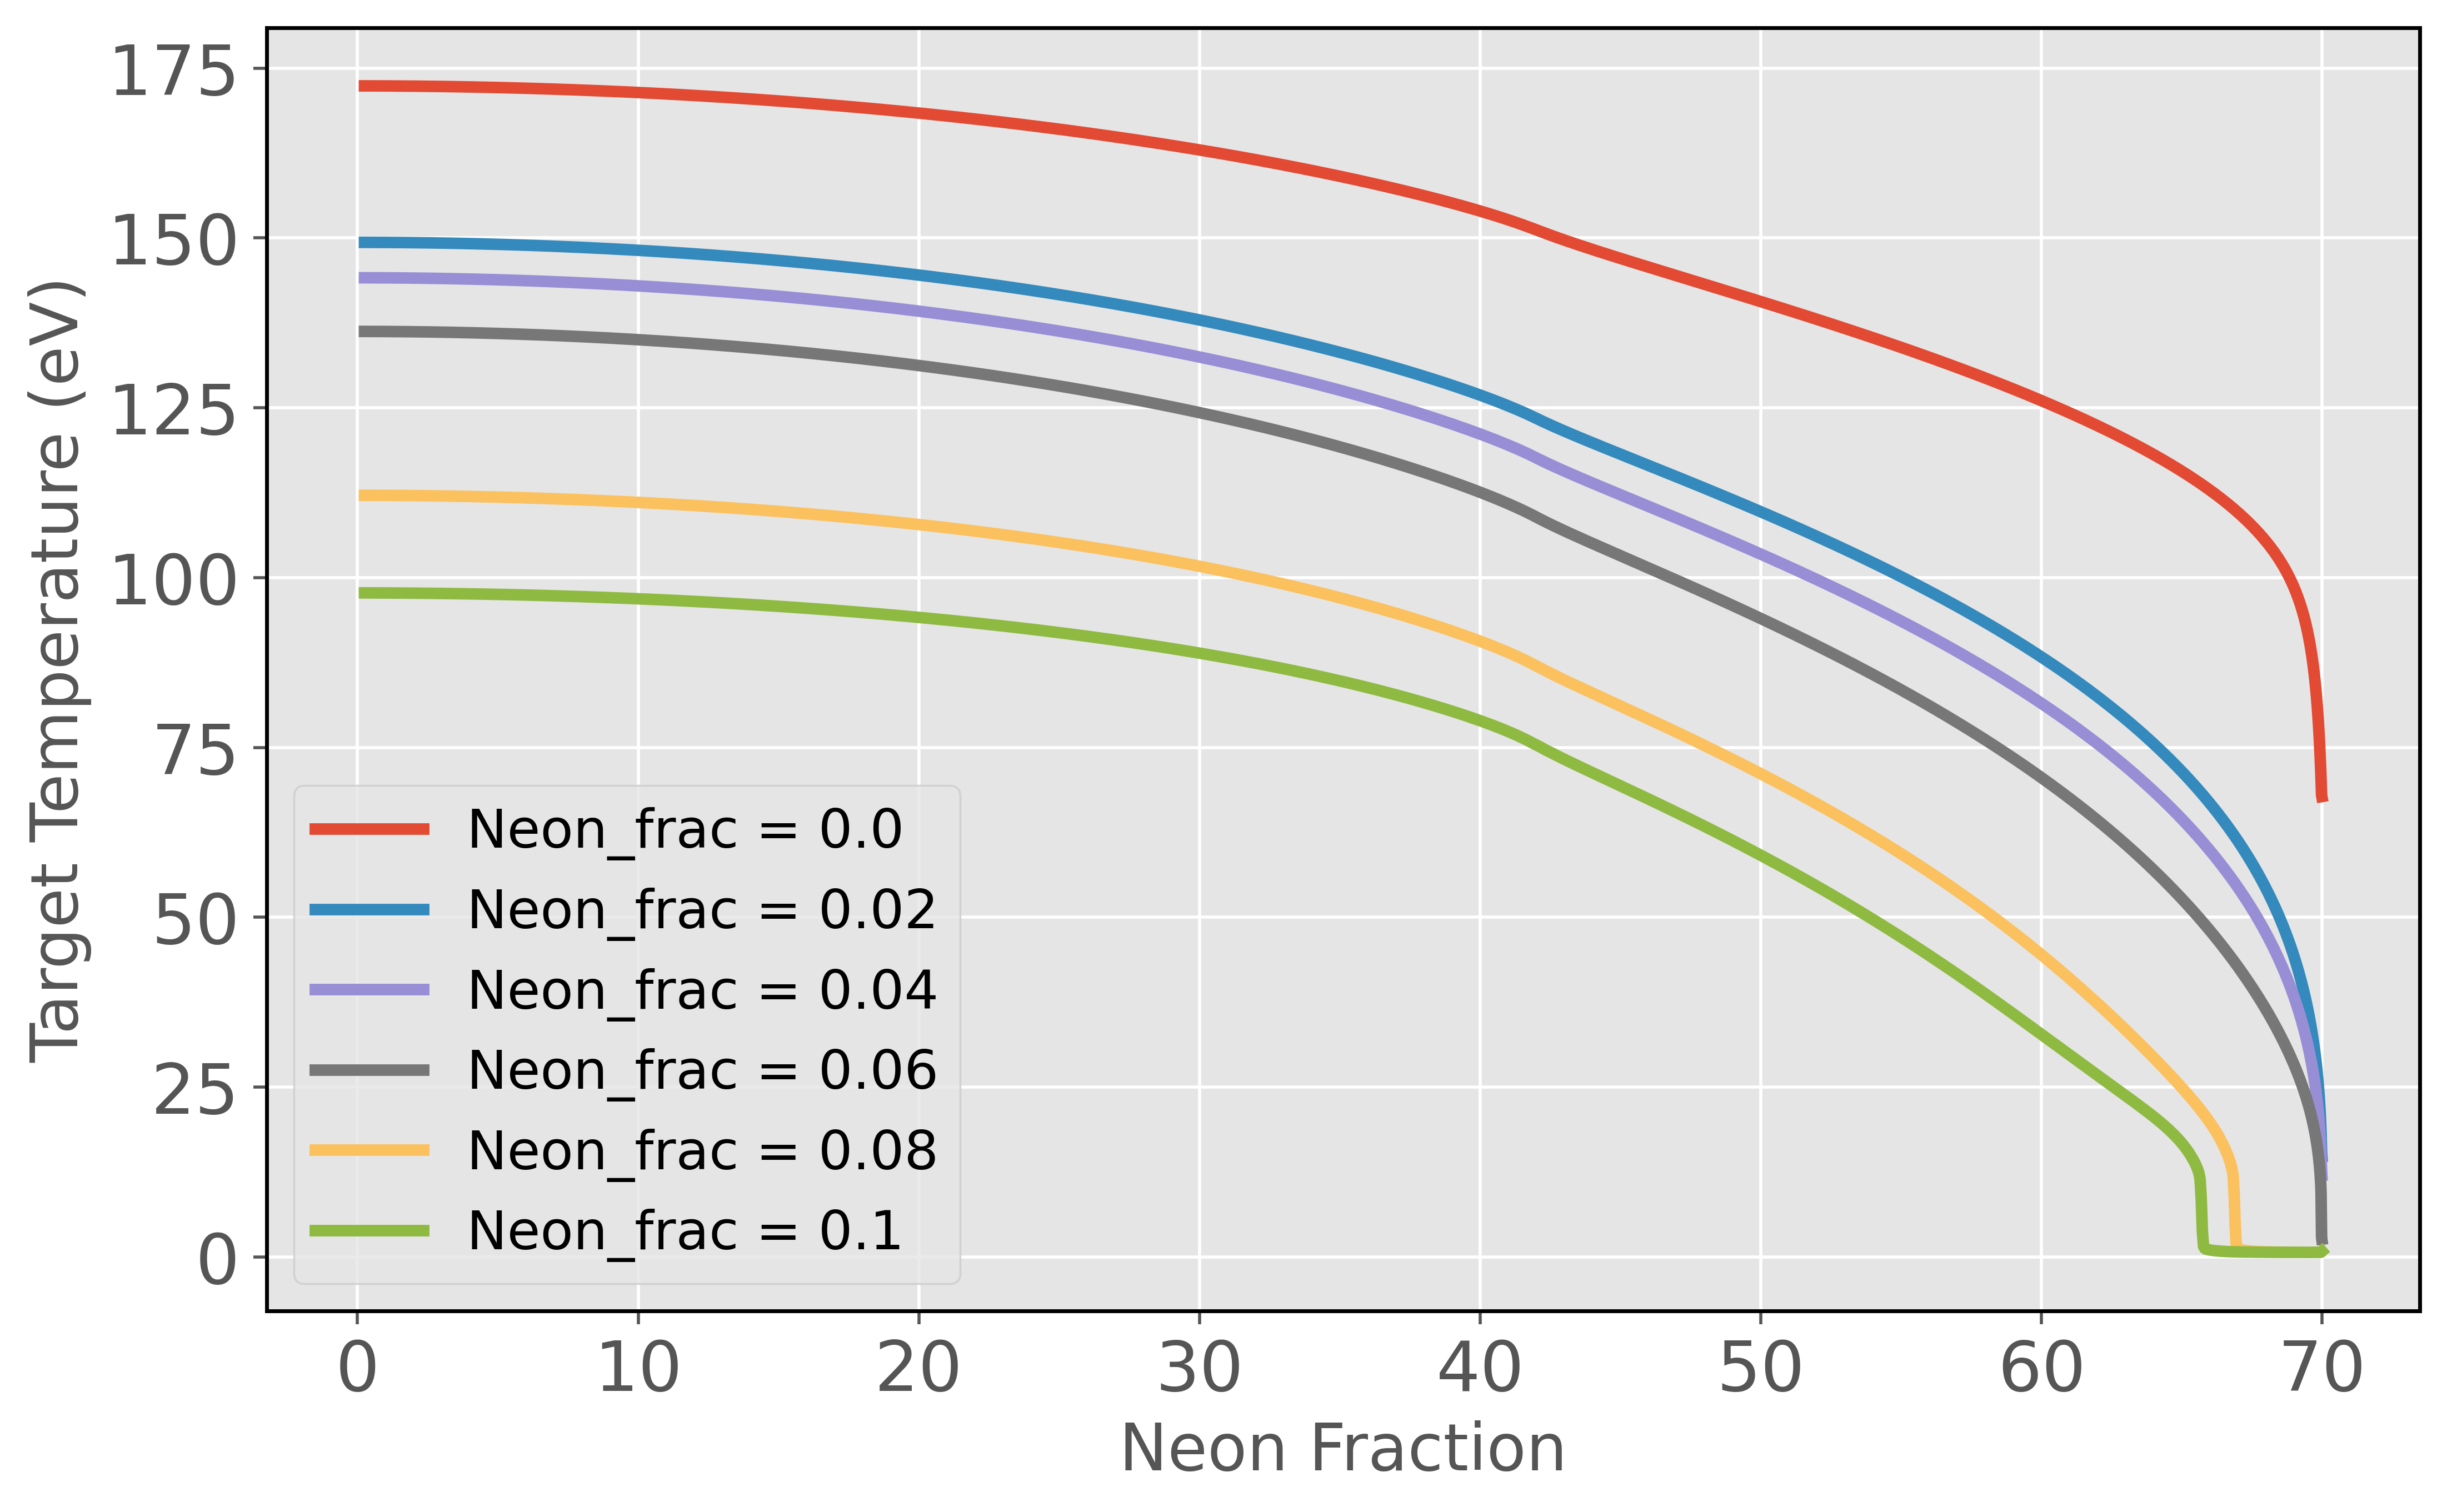

In [11]:
plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams.update({'font.size': 14})

ds = pd.read_pickle('/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/flux_limit/Flux_limiter_detachment_ITER_final.pickle')



fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi = 500)

# print(ds['alpha'].unique())

for i in ds['alpha'].unique():
    if i == 'SNB':  # Exclude plotting for alpha = 'SNB'
        target_temp_list = []
        target_pcle_flux_list = []
        neon_frac_list = []
        df_alpha = ds[ds['alpha'] == f'{i}']
        if i == 'SH':
            linestyle = '--'
        elif i == 'SNB':
            linestyle = ':'
        else:
            linestyle = '-'

        for j in df_alpha['neon_frac'].unique():
            # print(df_alpha['neon_frac'].unique())
            if j in [0.0, 0.02, 0.04, 0.06, 0.08, 0.1]:
                x = ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['y']
                Te = ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['Te']
                ax.plot(x,Te, linewidth=linewidth, label=r'Neon_frac = ' + f'{j}')


ax.set_xlabel('Neon Fraction')
ax.set_ylabel('Target Temperature (eV)')

# Set the outline color to black
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

plt.legend()


# # Get handles and labels
# handles, labels = plt.gca().get_legend_handles_labels()

# # Desired order (SH, 0.2, 0.06)
# order = [0, 2, 1, 3]

# # Reorder handles and labels
# handles = [handles[i] for i in order]
# labels = [labels[i] for i in order]

# # Create the legend with the new order
# plt.legend(handles, labels)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10}, )
# plt.rcParams['figure.dpi'] = 300

linewidth = 3
markersize = 10

# Constants
m = 4.65e-26  # mass of the particles in kg (for example, for an oxygen molecule)
k = 1.38e-23  # Boltzmann constant in J/K
T = 300  # temperature in K

# Define the Maxwell speed distribution function
def maxwell_speed_distribution(v, m, k, T):
    factor1 = (m / (2 * np.pi * k * T))**(3/2)
    factor2 = 4 * np.pi * v**2
    factor3 = np.exp(-m * v**2 / (2 * k * T))
    return factor1 * factor2 * factor3

# Compute the thermal velocity
v_th = np.sqrt(2 * k * T / m)

v_th_3d = 3*v_th

# Generate speed values
v = np.linspace(0, 2000, 1000)  # speed values

# Compute the Maxwell speed distribution
f_v = maxwell_speed_distribution(v, m, k, T)

# Plot the Maxwell speed distribution
plt.plot(v, f_v, label='Maxwellian Distribution')
plt.axvline(x=v_th, color='r', linestyle='--', label=r'$v_{th}$')
plt.axvline(x=v_th_3d, color='g', linestyle='--', label=r'$3*v_{th}$')
plt.xlabel('v')
plt.ylabel('f(v)')
plt.legend()
# plt.grid(True)
plt.xticks([])
plt.yticks([])
plt.show()
